# Robustness Checks

In [25]:
import pandas as pd
import numpy as np


In [26]:
robust = pd.read_csv('Downloads/robustness_df2.csv')

## Checks with known distribution

In [27]:
breakdown_by_region_and_income_quintile = pd.read_csv('Downloads/regional.csv')
breakdown_by_income_and_SOC = pd.read_csv('Downloads/occupation x region.csv')
breakdown_by_region_and_SOC = pd.read_csv('Downloads/prior2.csv')
breakdown_by_region_and_SOC_and_age = pd.read_csv('Downloads/age_sample.csv')
breakdown_by_region_and_income_and_age = pd.read_csv('Downloads/age-income-region.csv')
breakdown_by_tenure_label_and_age = pd.read_csv('Downloads/mortgage x age.csv')
breakdown_by_tenure_label_and_income = pd.read_csv('Downloads/mortgage x income.csv')
breakdown_by_tenure_label_and_region = pd.read_csv('Downloads/mortgage x region.csv')
breakdown_by_tenure_label_and_region_and_housing_cost = pd.read_csv('Downloads/housing cost x region.csv')
breakdown_by_tenure_label_and_incQ_and_housing_cost = pd.read_csv('Downloads/housing cost x income_quintile.csv')
breakdown_by_region_and_dti = pd.read_csv('Downloads/region x debt-to-income.csv')
breakdown_by_tenure_label_and_dti = pd.read_csv('Downloads/mortgage x debt-to-income.csv')
breakdown_by_age_group_and_late_flag = pd.read_csv('Downloads/age group x late flag.csv')
breakdown_by_tenure_label_and_late_flag = pd.read_csv('Downloads/mortgage x late flag.csv')
breakdown_by_income_and_SOC = breakdown_by_income_and_SOC.set_index('SOC_code')

## Sanity checks for unknown distribution

## Pairwise correlation checks

## More sanity checks

In [28]:
breakdown_by_income_and_SOC

North East North West  \
SOC_code                                                         
Managers, directors and senior officials     51,336     56,087   
Professional occupations                     41,035     45,030   
Associate professional and technical         34,908     36,246   
Administrative and secretarial               23,253     25,730   
Skilled trades                               33,199     33,680   
Caring, leisure and other services           19,960     20,265   
Sales and customer services                  18,290     18,866   
Process, plant and machine operatives        30,809     30,618   
Elementary occupations                       18,000     18,598   

                                         Yorkshire & Humber East Midlands  \
SOC_code                                                                    
Managers, directors and senior officials             53,097        52,415   
Professional occupations                             43,447        41,688   
Associate professional and technical                 34,200        34,551   
Administrative and secretarial                       24,563        23,458   
Skilled trades                                       33,693        33,775   
Caring, leisure and other services                   19,704        19,162   
Sales and customer services                          18,458        17,932   
Process, plant and machine operatives                31,888        30,450   
Elementary occupations                               18,863        19,217   

                                         West Midlands    East   London  \
SOC_code                                                                  
Managers, directors and senior officials        55,981  60,488  110,577   
Professional occupations                        43,062  43,172   61,406   
Associate professional and technical            40,705  37,478   48,530   
Administrative and secretarial                  24,575  24,058   30,962   
Skilled trades                                  34,194  34,912   36,175   
Caring, leisure and other services              19,409  20,248   23,487   
Sales and customer services                     18,228  18,073   21,064   
Process, plant and machine operatives           30,884  32,545   36,774   
Elementary occupations                          18,511  18,706   19,868   

                                         South East South West   Wales  
SOC_code                                                                
Managers, directors and senior officials     61,240     51,541  46,035  
Professional occupations                     47,159     43,058  42,955  
Associate professional and technical         39,792     32,798  32,726  
Administrative and secretarial               24,983     23,921  25,177  
Skilled trades                               34,242     33,043  33,243  
Caring, leisure and other services           20,037     20,197  19,411  
Sales and customer services                  18,256     16,815  18,204  
Process, plant and machine operatives        31,658     31,215  30,175  
Elementary occupations                       18,210     18,278  17,863

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/3829358169.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/3829358169.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(


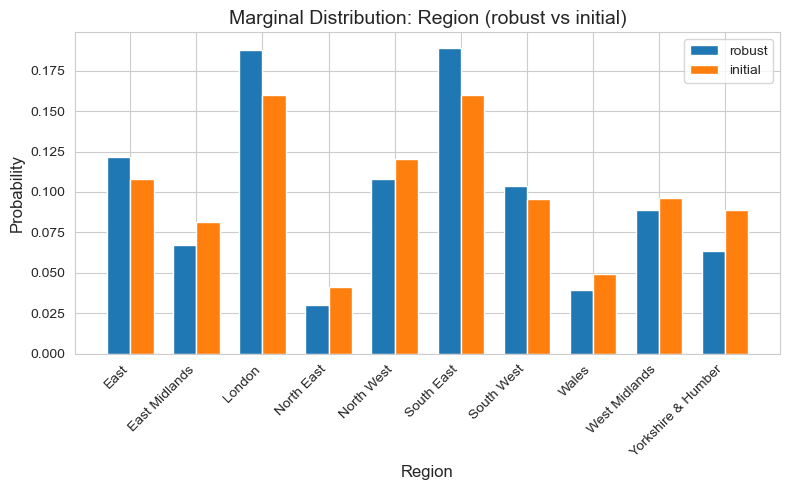

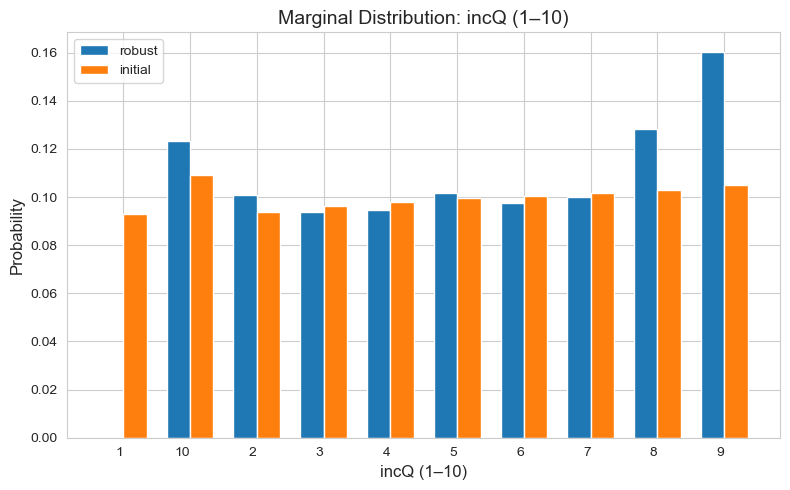

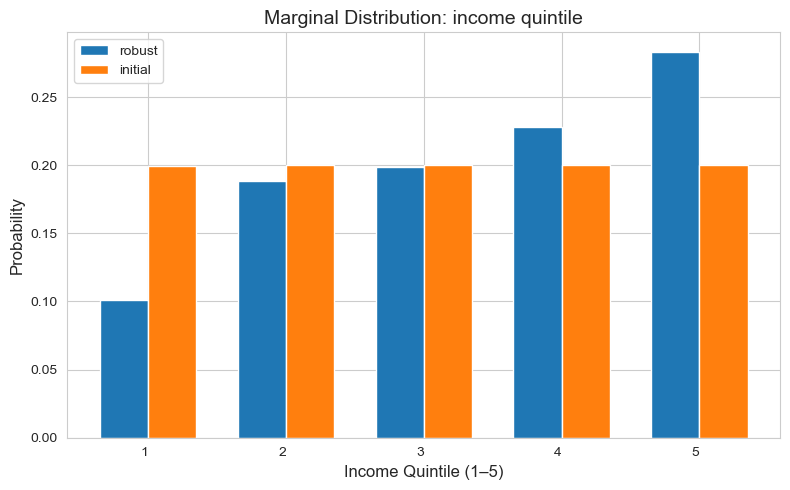

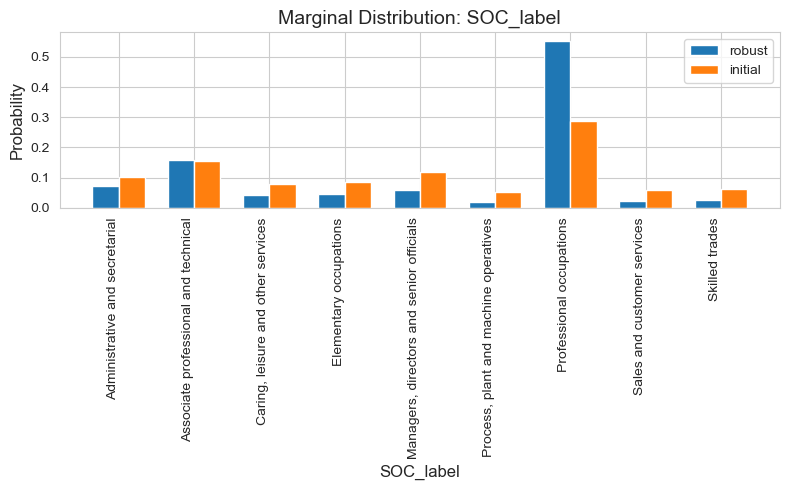

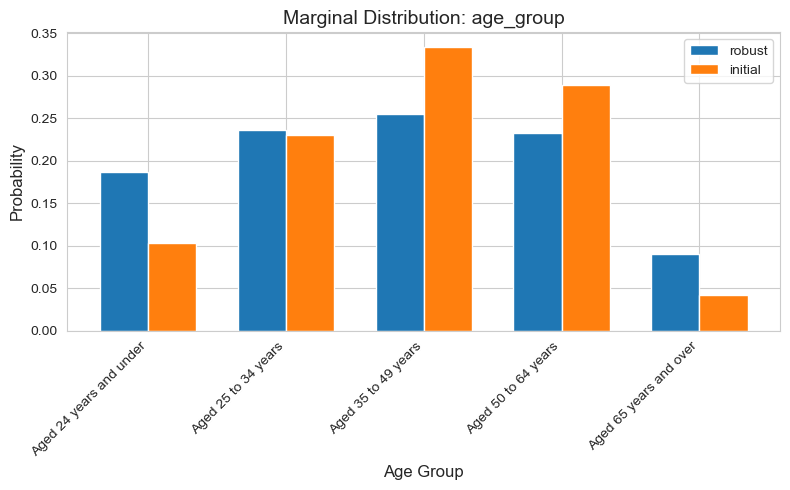

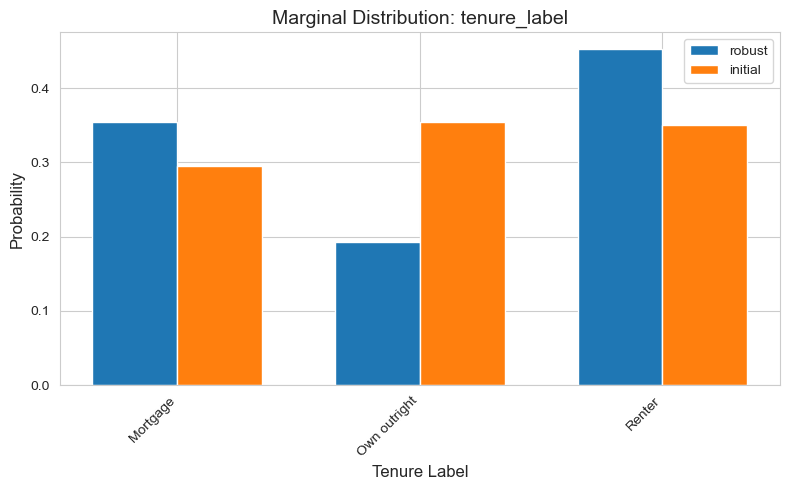

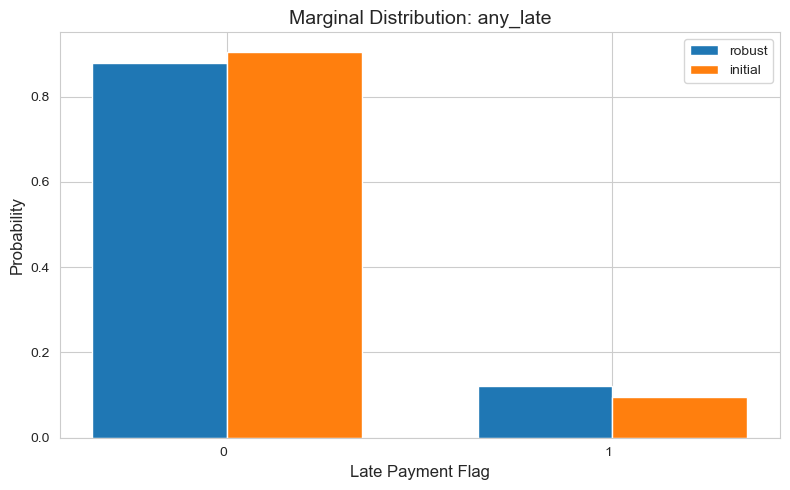

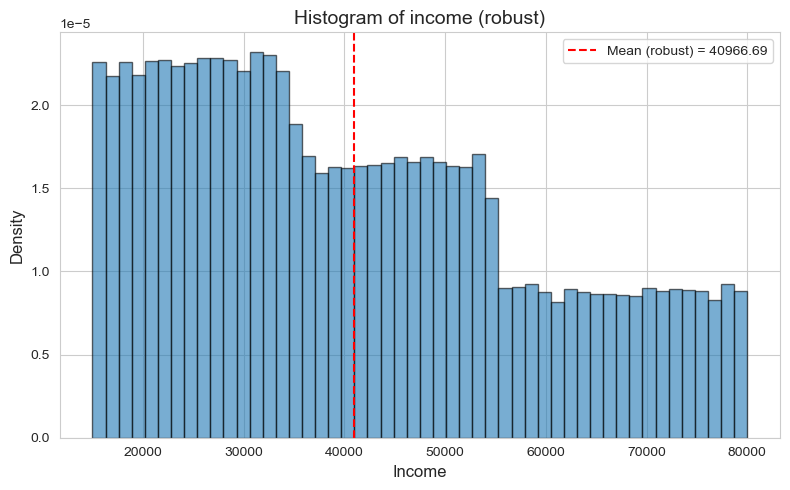

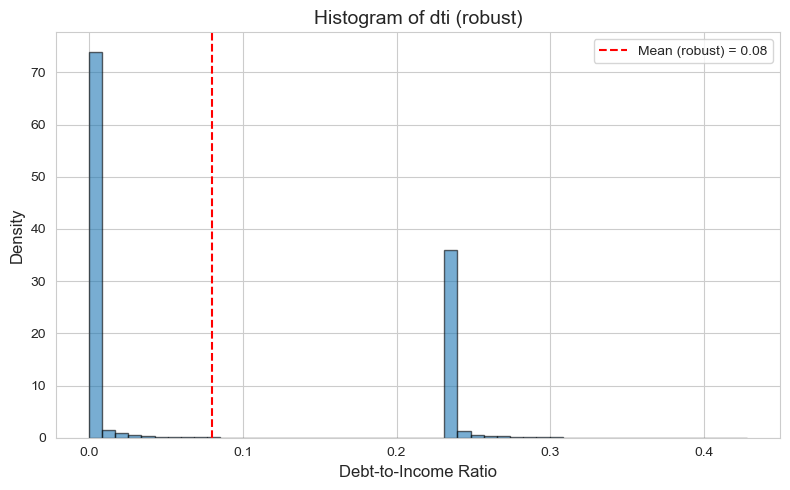

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# ─────────────────────────────────────────────────────────────────────────────
# 1) Helper to clean strings (remove commas, percent signs, whitespace) and convert to numeric
# ─────────────────────────────────────────────────────────────────────────────
def clean_and_numeric(series: pd.Series) -> pd.Series:
    """
    Convert a Series of potentially “dirty” strings (e.g. containing commas, '%', whitespace)
    into floats. Non‐convertible values become NaN.
    """
    # Step 1: Coerce everything to string
    s = series.astype(str)
    # Step 2: Remove commas and percent signs, then strip whitespace
    s = s.str.replace(',', '', regex=False).str.replace('%', '', regex=False).str.strip()
    # Step 3: Convert to numeric
    return pd.to_numeric(s, errors='coerce')


# ─────────────────────────────────────────────────────────────────────────────
# 2) Coerce every “initial” table’s numeric columns to real numerics
# ─────────────────────────────────────────────────────────────────────────────

# 2.a) breakdown_by_region_and_income_quintile (joint distribution: each cell = P(region, incQ) in %)
#    - Rows are regions, columns are incQ buckets (10, 9, …, 1).
#    - We will:
#      1) set 'group' as the index (region names),
#      2) apply clean_and_numeric to every cell,
#      3) normalize the entire table so that the sum of all cells = 1.
breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.set_index('group')
breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# Now convert percentages → probabilities by dividing by the total sum of the table
joint_total = breakdown_by_region_and_income_quintile.values.sum()
joint_prob_table = breakdown_by_region_and_income_quintile / joint_total

# 2.b) breakdown_by_region_and_SOC (counts in every cell)
breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.set_index('SOC_code')
breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 2.c) breakdown_by_region_and_SOC_and_age: clean 'Observation'
breakdown_by_region_and_SOC_and_age['Observation'] = clean_and_numeric(
    breakdown_by_region_and_SOC_and_age['Observation']
)

# 2.d) breakdown_by_region_and_income_and_age: clean 'income' and 'Observation'
breakdown_by_region_and_income_and_age['income'] = clean_and_numeric(
    breakdown_by_region_and_income_and_age['income']
)
breakdown_by_region_and_income_and_age['Observation'] = clean_and_numeric(
    breakdown_by_region_and_income_and_age['Observation']
)

# 2.e) breakdown_by_tenure_label_and_age: clean 'frequency'
breakdown_by_tenure_label_and_age['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_age['frequency']
)

# 2.f) breakdown_by_tenure_label_and_income: clean 'frequency'
breakdown_by_tenure_label_and_income['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_income['frequency']
)

# 2.g) breakdown_by_tenure_label_and_region: clean 'frequency'
breakdown_by_tenure_label_and_region['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_region['frequency']
)

# 2.h) breakdown_by_tenure_label_and_region_and_housing_cost: clean 'prop_mean', 'frequency'
breakdown_by_tenure_label_and_region_and_housing_cost['prop_mean'] = clean_and_numeric(
    breakdown_by_tenure_label_and_region_and_housing_cost['prop_mean']
)
breakdown_by_tenure_label_and_region_and_housing_cost['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_region_and_housing_cost['frequency']
)

# 2.i) breakdown_by_tenure_label_and_incQ_and_housing_cost: clean 'prop_mean', 'frequency'
breakdown_by_tenure_label_and_incQ_and_housing_cost['prop_mean'] = clean_and_numeric(
    breakdown_by_tenure_label_and_incQ_and_housing_cost['prop_mean']
)
breakdown_by_tenure_label_and_incQ_and_housing_cost['frequency'] = clean_and_numeric(
    breakdown_by_tenure_label_and_incQ_and_housing_cost['frequency']
)

# 2.j) breakdown_by_region_and_dti: clean 'debt-to-income', 'Observation'
breakdown_by_region_and_dti['debt-to-income'] = clean_and_numeric(
    breakdown_by_region_and_dti['debt-to-income']
)
breakdown_by_region_and_dti['Observation'] = clean_and_numeric(
    breakdown_by_region_and_dti['Observation']
)

# 2.k) breakdown_by_tenure_label_and_dti: clean 'debt-to-income', 'Observations'
breakdown_by_tenure_label_and_dti['debt-to-income'] = clean_and_numeric(
    breakdown_by_tenure_label_and_dti['debt-to-income']
)
breakdown_by_tenure_label_and_dti['Observations'] = clean_and_numeric(
    breakdown_by_tenure_label_and_dti['Observations']
)

# 2.l) breakdown_by_age_group_and_late_flag: clean 'late flag', 'Observations'
breakdown_by_age_group_and_late_flag['late flag'] = clean_and_numeric(
    breakdown_by_age_group_and_late_flag['late flag']
)
breakdown_by_age_group_and_late_flag['Observations'] = clean_and_numeric(
    breakdown_by_age_group_and_late_flag['Observations']
)

# 2.m) breakdown_by_tenure_label_and_late_flag: clean 'late flag', 'Observations'
breakdown_by_tenure_label_and_late_flag['late flag'] = clean_and_numeric(
    breakdown_by_tenure_label_and_late_flag['late flag']
)
breakdown_by_tenure_label_and_late_flag['Observations'] = clean_and_numeric(
    breakdown_by_tenure_label_and_late_flag['Observations']
)


# ─────────────────────────────────────────────────────────────────────────────
# 3) Compute empirical marginals from `robust`
# ─────────────────────────────────────────────────────────────────────────────

robust_region = robust['region'].value_counts(normalize=True)

robust_incQ = robust['incQ'].value_counts(normalize=True)
robust_incQ.index = robust_incQ.index.astype(int)

robust_inc5 = robust['income quintile'].value_counts(normalize=True)
robust_inc5.index = robust_inc5.index.astype(int)

robust_soc = robust['SOC_label'].value_counts(normalize=True)

robust_age = robust['age_group'].value_counts(normalize=True)

robust_tenure = robust['tenure_label'].value_counts(normalize=True)

robust_late = robust['any_late'].value_counts(normalize=True)


# ─────────────────────────────────────────────────────────────────────────────
# 4) Compute “initial” marginals from each breakdown table, using corrected joint probabilities
# ─────────────────────────────────────────────────────────────────────────────

# 4.a) From corrected joint_prob_table (region × incQ):
#      - Marginal over incQ (1–10)
initial_incQ = joint_prob_table.sum(axis=0)
initial_incQ.index = initial_incQ.index.astype(int)  # ensure incQ are ints 1–10

#      - Marginal over region
initial_region_from_incQ = joint_prob_table.sum(axis=1)

# 4.b) From breakdown_by_tenure_label_and_income (already cleaned), get marginal over income quintile (1–5)
tmp = breakdown_by_tenure_label_and_income.groupby('income quintile')['frequency'].sum()
initial_inc5 = tmp / tmp.sum()
initial_inc5.index = initial_inc5.index.astype(int)

# 4.c) From breakdown_by_tenure_label_and_region (already cleaned), get marginal over region
tmp = breakdown_by_tenure_label_and_region.groupby('region')['frequency'].sum()
initial_region_from_tenure = tmp / tmp.sum()

# 4.d) From breakdown_by_region_and_SOC (counts), get marginal over SOC_label
initial_soc_counts = breakdown_by_region_and_SOC.sum(axis=1)
initial_soc = initial_soc_counts / initial_soc_counts.sum()

# 4.e) From breakdown_by_region_and_SOC_and_age (already cleaned), get marginal over age group
tmp = breakdown_by_region_and_SOC_and_age.groupby('age group')['Observation'].sum()
initial_age = tmp / tmp.sum()

# 4.f) From breakdown_by_tenure_label_and_region (already cleaned), get marginal over tenure label
tmp = breakdown_by_tenure_label_and_region.groupby('tenure label')['frequency'].sum()
initial_tenure = tmp / tmp.sum()

# 4.g) From breakdown_by_age_group_and_late_flag (already cleaned), compute overall late‐payment rate
df_late_age = breakdown_by_age_group_and_late_flag.copy()
df_late_age['late_count'] = df_late_age['late flag'] * df_late_age['Observations']
initial_late_rate = df_late_age['late_count'].sum() / df_late_age['Observations'].sum()
initial_late = pd.Series({0: 1 - initial_late_rate, 1: initial_late_rate})


# ─────────────────────────────────────────────────────────────────────────────
# 5) Plot side‐by‐side comparisons for each categorical margin
# ─────────────────────────────────────────────────────────────────────────────

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

def _plot_side_by_side(series_df: pd.Series,
                       series_initial: pd.Series,
                       xlabel: str,
                       title: str,
                       xtick_rotation: float = 0):
    # 1) Merge into a single DataFrame and fill NaNs with 0
    df = pd.DataFrame({
        'robust': series_df,
        'initial': series_initial
    }).fillna(0)
    
    # 2) Cast index to string, then sort
    df.index = df.index.astype(str)
    df = df.sort_index()
    
    # 3) Extract values for plotting
    labels = list(df.index)
    robust_vals = df['robust'].values
    initial_vals = df['initial'].values
    
    x = range(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots()
    ax.bar([i - width/2 for i in x], robust_vals, width=width, label='robust')
    ax.bar([i + width/2 for i in x], initial_vals, width=width, label='initial')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=xtick_rotation, ha='right')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Probability')
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()


# 5.1) Region
_plot_side_by_side(
    series_df      = robust_region,
    series_initial = initial_region_from_incQ,
    xlabel         = 'Region',
    title          = 'Marginal Distribution: Region (robust vs initial)',
    xtick_rotation = 45
)

# 5.2) incQ (1–10)
_plot_side_by_side(
    series_df      = robust_incQ,
    series_initial = initial_incQ,
    xlabel         = 'incQ (1–10)',
    title          = 'Marginal Distribution: incQ (1–10)',
    xtick_rotation = 0
)

# 5.3) income quintile (1–5)
_plot_side_by_side(
    series_df      = robust_inc5,
    series_initial = initial_inc5,
    xlabel         = 'Income Quintile (1–5)',
    title          = 'Marginal Distribution: income quintile',
    xtick_rotation = 0
)

# 5.4) SOC_label
_plot_side_by_side(
    series_df      = robust_soc,
    series_initial = initial_soc,
    xlabel         = 'SOC_label',
    title          = 'Marginal Distribution: SOC_label',
    xtick_rotation = 90
)

# 5.5) age_group
_plot_side_by_side(
    series_df      = robust_age,
    series_initial = initial_age,
    xlabel         = 'Age Group',
    title          = 'Marginal Distribution: age_group',
    xtick_rotation = 45
)

# 5.6) tenure_label
_plot_side_by_side(
    series_df      = robust_tenure,
    series_initial = initial_tenure,
    xlabel         = 'Tenure Label',
    title          = 'Marginal Distribution: tenure_label',
    xtick_rotation = 45
)

# 5.7) any_late (0/1)
_plot_side_by_side(
    series_df      = robust_late,
    series_initial = initial_late,
    xlabel         = 'Late Payment Flag',
    title          = 'Marginal Distribution: any_late',
    xtick_rotation = 0
)


# ─────────────────────────────────────────────────────────────────────────────
# 6) Histogram of a continuous variable (example: 'income' in `robust`)
# ─────────────────────────────────────────────────────────────────────────────

fig, ax = plt.subplots()
ax.hist(robust['income'], bins=50, density=True, alpha=0.6, edgecolor='black')
mean_income = robust['income'].mean()
ax.axvline(mean_income, color='red', linestyle='--', label=f"Mean (robust) = {mean_income:.2f}")
ax.set_xlabel('Income')
ax.set_ylabel('Density')
ax.set_title('Histogram of income (robust)')
ax.legend()
plt.tight_layout()
plt.show()

# ─────────────────────────────────────────────────────────────────────────────
# 7) (Optional) Histogram for another continuous column, e.g. 'dti'
# ─────────────────────────────────────────────────────────────────────────────

fig, ax = plt.subplots()
ax.hist(robust['dti'], bins=50, density=True, alpha=0.6, edgecolor='black')
mean_dti = robust['dti'].mean()
ax.axvline(mean_dti, color='red', linestyle='--', label=f"Mean (robust) = {mean_dti:.2f}")
ax.set_xlabel('Debt-to-Income Ratio')
ax.set_ylabel('Density')
ax.set_title('Histogram of dti (robust)')
ax.legend()
plt.tight_layout()
plt.show()


In [30]:
#breakdown_by_income_and_SOC
#breakdown_by_region_and_SOC
breakdown_by_tenure_label_and_dti

tenure label  debt-to-income  Observations
0  Own outright           0.061          4268
1      Mortgage           0.186          4368
2        Renter           0.122          4254

In [31]:
import pandas as pd

# ─────────────────────────────────────────────────────────────────────────────
# ASSUMPTION: All DataFrames (robust and the 14 breakdown_* tables) are already
# loaded into your environment with exactly the names used below.
#
# Columns in `robust`:
#   'income', 'incQ', 'dti', 'region', 'SOC_label', 'any_late', 'age_group',
#   'income quintile', 'tenure_label', 'housing_cost', 'other essential spending'
#
# Breakdown tables:
#   • breakdown_by_region_and_income_quintile   (rows=region, cols=incQ, values=percent %)
#   • breakdown_by_income_and_SOC               (rows=SOC_label, cols=region, values=avg salary)
#   • breakdown_by_region_and_SOC               (rows=SOC_label, cols=region, values=counts)
#   • breakdown_by_region_and_SOC_and_age       (cols=['region','SOC_label','age_group','Observation'])
#   • breakdown_by_region_and_income_and_age    (cols=['region','age_group','income','Observation'])
#   • breakdown_by_tenure_label_and_age         (cols=['age_group','tenure_label','frequency'])
#   • breakdown_by_tenure_label_and_income      (cols=['income quintile','tenure_label','frequency'])
#   • breakdown_by_tenure_label_and_region      (cols=['region','tenure_label','frequency'])
#   • breakdown_by_tenure_label_and_region_and_housing_cost
#         (cols=['region','tenure_label','prop_mean','frequency'])
#   • breakdown_by_tenure_label_and_incQ_and_housing_cost
#         (cols=['income quintile','tenure_label','prop_mean','frequency'])
#   • breakdown_by_region_and_dti                (cols=['region','debt-to-income','Observation'])
#   • breakdown_by_tenure_label_and_dti          (cols=['tenure_label','debt-to-income','Observations'])
#   • breakdown_by_age_group_and_late_flag       (cols=['age_group','late flag','Observations'])
#   • breakdown_by_tenure_label_and_late_flag    (cols=['tenure_label','late flag','Observations'])
# ─────────────────────────────────────────────────────────────────────────────

# Helper: convert any “frequency” or “Observation” columns in breakdown tables to numeric,
#          in case they were strings. If they are already numeric, pd.to_numeric will have no effect.
def _ensure_numeric(df, cols):
    for c in cols:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace(',', '', regex=False)
            .str.replace('%', '', regex=False)
            .str.strip()
        )
        df[c] = pd.to_numeric(df[c], errors='coerce')
    return df


# ─────────────────────────────────────────────────────────────────────────────
# 1) Clean and normalize breakdown_by_region_and_income_quintile as a joint distribution
# ─────────────────────────────────────────────────────────────────────────────

# 1.a) First, set 'group' (region) as the index, then convert all cells from strings like "1.04%" to floats

breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
    lambda x: pd.to_numeric(str(x).replace('%', '').strip(), errors='coerce')
)

# 1.b) Convert percentages into probabilities so that the entire table sums to 1
joint_total = breakdown_by_region_and_income_quintile.values.sum()
joint_prob_table = breakdown_by_region_and_income_quintile / joint_total  # now P(region, incQ)

# ─────────────────────────────────────────────────────────────────────────────
# 2) Coerce all other breakdown tables’ numeric columns to numeric types
# ─────────────────────────────────────────────────────────────────────────────
# (If they are already numeric, this will do nothing extra beyond ensuring types.)
breakdown_by_income_and_SOC = _ensure_numeric(
    breakdown_by_income_and_SOC,
    list(breakdown_by_income_and_SOC.columns)
)

breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(
    lambda x: pd.to_numeric(str(x).strip(), errors='coerce')
)
breakdown_by_region_and_SOC_and_age = _ensure_numeric(
    breakdown_by_region_and_SOC_and_age, ['Observation']
)
breakdown_by_region_and_income_and_age = _ensure_numeric(
    breakdown_by_region_and_income_and_age, ['income', 'Observation']
)
breakdown_by_tenure_label_and_age = _ensure_numeric(
    breakdown_by_tenure_label_and_age, ['frequency']
)
breakdown_by_tenure_label_and_income = _ensure_numeric(
    breakdown_by_tenure_label_and_income, ['frequency']
)
breakdown_by_tenure_label_and_region = _ensure_numeric(
    breakdown_by_tenure_label_and_region, ['frequency']
)
breakdown_by_tenure_label_and_region_and_housing_cost = _ensure_numeric(
    breakdown_by_tenure_label_and_region_and_housing_cost, ['prop_mean', 'frequency']
)
breakdown_by_tenure_label_and_incQ_and_housing_cost = _ensure_numeric(
    breakdown_by_tenure_label_and_incQ_and_housing_cost, ['prop_mean', 'frequency']
)
breakdown_by_region_and_dti = _ensure_numeric(
    breakdown_by_region_and_dti, ['debt-to-income', 'Observation']
)
breakdown_by_tenure_label_and_dti = _ensure_numeric(
    breakdown_by_tenure_label_and_dti, ['debt-to-income', 'Observations']
)
breakdown_by_age_group_and_late_flag = _ensure_numeric(
    breakdown_by_age_group_and_late_flag, ['late flag', 'Observations']
)
breakdown_by_tenure_label_and_late_flag = _ensure_numeric(
    breakdown_by_tenure_label_and_late_flag, ['late flag', 'Observations']
)

# ─────────────────────────────────────────────────────────────────────────────
# 3) Compute empirical marginals from `robust`
# ─────────────────────────────────────────────────────────────────────────────
robust_region   = robust['region'].value_counts(normalize=True)
robust_incQ     = robust['incQ'].value_counts(normalize=True);    robust_incQ.index = robust_incQ.index.astype(int)
robust_inc5     = robust['income quintile'].value_counts(normalize=True);  robust_inc5.index = robust_inc5.index.astype(int)
robust_soc      = robust['SOC_label'].value_counts(normalize=True)
robust_age      = robust['age_group'].value_counts(normalize=True)
robust_tenure   = robust['tenure_label'].value_counts(normalize=True)
robust_late     = robust['any_late'].value_counts(normalize=True)

# ─────────────────────────────────────────────────────────────────────────────
# 4) Compute “initial” marginals from each breakdown table, using corrected joint table for region/incQ
# ─────────────────────────────────────────────────────────────────────────────

# 4.a) From the joint_prob_table (region × incQ):
#       - Marginal over incQ (1–10):
initial_incQ = joint_prob_table.sum(axis=0)
initial_incQ.index = initial_incQ.index.astype(int)  # ensure incQ buckets are ints

#       - Marginal over region:
initial_region_from_incQ = joint_prob_table.sum(axis=1)

# 4.b) From breakdown_by_tenure_label_and_income: marginal over income quintile (1–5)
tmp = breakdown_by_tenure_label_and_income.groupby('income quintile')['frequency'].sum()
initial_inc5 = tmp.div(tmp.sum());      initial_inc5.index = initial_inc5.index.astype(int)

# 4.c) From breakdown_by_tenure_label_and_region: marginal over region
tmp = breakdown_by_tenure_label_and_region.groupby('region')['frequency'].sum()
initial_region_from_tenure = tmp.div(tmp.sum())

# 4.d) From breakdown_by_region_and_SOC (counts by SOC × region): marginal over SOC_label
initial_soc_counts = breakdown_by_region_and_SOC.sum(axis=1)
initial_soc = initial_soc_counts.div(initial_soc_counts.sum())

# 4.e) From breakdown_by_region_and_SOC_and_age: marginal over age_group
tmp = breakdown_by_region_and_SOC_and_age.groupby('age group')['Observation'].sum()
initial_age = tmp.div(tmp.sum())

# 4.f) From breakdown_by_tenure_label_and_region: marginal over tenure_label
tmp = breakdown_by_tenure_label_and_region.groupby('tenure label')['frequency'].sum()
initial_tenure = tmp.div(tmp.sum())

# 4.g) From breakdown_by_age_group_and_late_flag: compute overall late‐payment rate
df_late_age = breakdown_by_age_group_and_late_flag.copy()
df_late_age['late_count'] = df_late_age['late flag'] * df_late_age['Observations']
initial_late_rate = df_late_age['late_count'].sum() / df_late_age['Observations'].sum()
initial_late = pd.Series({0: 1 - initial_late_rate, 1: initial_late_rate})

# ─────────────────────────────────────────────────────────────────────────────
# 5) Conditional Marginals / Conditional Means (at least 10)
# ─────────────────────────────────────────────────────────────────────────────

# 5.1) P(tenure_label | income quintile) – Robust & Initial
cond_tenure_inc5_robust = (
    robust
    .groupby(['income quintile', 'tenure_label'])
    .size()
    .div(robust.groupby('income quintile').size(), level='income quintile')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_income.groupby(['income quintile', 'tenure label'])['frequency'].sum()
cond_tenure_inc5_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.2) P(tenure_label | region) – Robust & Initial
cond_tenure_region_robust = (
    robust
    .groupby(['region', 'tenure_label'])
    .size()
    .div(robust.groupby('region').size(), level='region')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_region.groupby(['region', 'tenure label'])['frequency'].sum()
cond_tenure_region_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.3) P(tenure_label | incQ) – Robust & Initial
cond_tenure_incQ_robust = (
    robust
    .groupby(['incQ', 'tenure_label'])
    .size()
    .div(robust.groupby('incQ').size(), level='incQ')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_incQ_and_housing_cost.groupby(['income quintile', 'tenure_label'])['frequency'].sum()
# Note: In this table, the column is named 'income quintile' but represents the decile (incQ) key
cond_tenure_incQ_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.4) P(age_group | tenure_label) – Robust & Initial
cond_age_tenure_robust = (
    robust
    .groupby(['tenure_label', 'age_group'])
    .size()
    .div(robust.groupby('tenure_label').size(), level='tenure_label')
    .unstack(fill_value=0)
)
tmp = breakdown_by_tenure_label_and_age.groupby(['tenure label', 'age group'])['frequency'].sum()
cond_age_tenure_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)

# 5.5) E[income | SOC_label, region] – Robust & Initial
avg_income_soc_region_robust = (
    robust
    .groupby(['SOC_label', 'region'])['income']
    .mean()
    .unstack(fill_value=0)
)
avg_income_soc_region_initial = breakdown_by_income_and_SOC.copy()


# 5.6) P(SOC_label | region) – Robust & Initial
counts_soc_region_robust = (
    robust
    .groupby(['region', 'SOC_label'])
    .size()
    .unstack(fill_value=0)
)
cond_soc_region_robust = counts_soc_region_robust.div(counts_soc_region_robust.sum(axis=1), axis=0)

counts_soc_region_initial = breakdown_by_region_and_SOC.copy()
cond_soc_region_initial = counts_soc_region_initial.div(counts_soc_region_initial.sum(axis=0), axis=1)

# 5.7) P(age_group | region & SOC_label) – Robust
counts_age_region_soc_robust = (
    robust
    .groupby(['region', 'SOC_label', 'age_group'])
    .size()
    .rename('count')
    .reset_index()
)
counts_age_region_soc_robust['cond_prob'] = (
    counts_age_region_soc_robust['count']
    / counts_age_region_soc_robust
        .groupby(['region', 'SOC_label'])['count']
        .transform('sum')
)
cond_age_region_soc_robust = counts_age_region_soc_robust.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)

# 5.7b) P(age_group | region & SOC_label) – Initial
tmp = breakdown_by_region_and_SOC_and_age.copy()
tmp['cond_prob'] = (
    tmp['Observation']
    / tmp.groupby(['region', 'SOC_label'])['Observation'].transform('sum')
)
cond_age_region_soc_initial = tmp.pivot_table(
    index=['region', 'SOC_label'],
    columns='age group',
    values='cond_prob',
    fill_value=0
)

# 5.8) E[income | region, age_group] – Robust & Initial
avg_income_region_age_robust = (
    robust
    .groupby(['region', 'age_group'])['income']
    .mean()
    .unstack(fill_value=0)
)
avg_income_region_age_initial = breakdown_by_region_and_income_and_age.pivot(
    index='region',
    columns='age group',
    values='income'
).fillna(0)

# 5.9) E[dti | region] – Robust & Initial
avg_dti_region_robust = robust.groupby('region')['dti'].mean()
avg_dti_region_initial = breakdown_by_region_and_dti.set_index('region')['debt-to-income']

# 5.10) E[dti | tenure_label] – Robust & Initial
avg_dti_tenure_robust = robust.groupby('tenure_label')['dti'].mean()
avg_dti_tenure_initial = breakdown_by_tenure_label_and_dti.set_index('tenure label')['debt-to-income']

# 5.11) P(late=1 | age_group) – Robust & Initial
late_by_age = robust.groupby('age_group')['any_late'].mean()
late_by_age_initial = breakdown_by_age_group_and_late_flag.set_index('age group')['late flag']

# 5.12) P(late=1 | tenure_label) – Robust & Initial
late_by_tenure = robust.groupby('tenure_label')['any_late'].mean()
late_by_tenure_initial = breakdown_by_tenure_label_and_late_flag.set_index('tenure label')['late flag']

# 5.13) E[housing_prop | region, tenure_label] – Robust & Initial
avg_housing_prop_region_tenure_robust = (
    robust
    .assign(housing_prop = robust['housing_cost'] / robust['income'])
    .groupby(['region', 'tenure_label'])['housing_prop']
    .mean()
    .unstack(fill_value=0)
)
avg_housing_prop_region_tenure_initial = (
    breakdown_by_tenure_label_and_region_and_housing_cost
    .pivot(index='region', columns='tenure_label', values='prop_mean')
    .fillna(0)
)

# 5.14) E[housing_prop | income quintile, tenure_label] – Robust & Initial
avg_housing_prop_inc5_tenure_robust = (
    robust
    .assign(housing_prop = robust['housing_cost'] / robust['income'])
    .groupby(['income quintile', 'tenure_label'])['housing_prop']
    .mean()
    .unstack(fill_value=0)
)
avg_housing_prop_inc5_tenure_initial = (
    breakdown_by_tenure_label_and_incQ_and_housing_cost
    .pivot(index='income quintile', columns='tenure_label', values='prop_mean')
    .fillna(0)
)

# ─────────────────────────────────────────────────────────────────────────────
# You now have at least 10 conditional marginals / means to inspect, for example:
#
#   print("=== P(tenure_label | incQ) – Robust ===")
#   print(cond_tenure_incQ_robust.head())
#   print("\n=== P(tenure_label | incQ) – Initial ===")
#   print(cond_tenure_incQ_initial.head())
#
# Or, to compare average income by SOC and region:
#
#   print("=== E[income | SOC_label, region] – Robust ===")
#   print(avg_income_soc_region_robust.head())
#   print("\n=== E[income | SOC_label, region] – Initial ===")
#   print(avg_income_soc_region_initial.head())
#
# And so on for any of the conditional tables above.


/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/3001772445.py:51: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_income_quintile = breakdown_by_region_and_income_quintile.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/3001772445.py:68: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  breakdown_by_region_and_SOC = breakdown_by_region_and_SOC.applymap(


In [32]:
#breakdown_by_region_and_income_quintile
breakdown_by_income_and_SOC

North East  North West  \
SOC_code                                                           
Managers, directors and senior officials       51336       56087   
Professional occupations                       41035       45030   
Associate professional and technical           34908       36246   
Administrative and secretarial                 23253       25730   
Skilled trades                                 33199       33680   
Caring, leisure and other services             19960       20265   
Sales and customer services                    18290       18866   
Process, plant and machine operatives          30809       30618   
Elementary occupations                         18000       18598   

                                          Yorkshire & Humber  East Midlands  \
SOC_code                                                                      
Managers, directors and senior officials               53097          52415   
Professional occupations                               43447          41688   
Associate professional and technical                   34200          34551   
Administrative and secretarial                         24563          23458   
Skilled trades                                         33693          33775   
Caring, leisure and other services                     19704          19162   
Sales and customer services                            18458          17932   
Process, plant and machine operatives                  31888          30450   
Elementary occupations                                 18863          19217   

                                          West Midlands   East  London  \
SOC_code                                                                 
Managers, directors and senior officials          55981  60488  110577   
Professional occupations                          43062  43172   61406   
Associate professional and technical              40705  37478   48530   
Administrative and secretarial                    24575  24058   30962   
Skilled trades                                    34194  34912   36175   
Caring, leisure and other services                19409  20248   23487   
Sales and customer services                       18228  18073   21064   
Process, plant and machine operatives             30884  32545   36774   
Elementary occupations                            18511  18706   19868   

                                          South East  South West  Wales  
SOC_code                                                                 
Managers, directors and senior officials       61240       51541  46035  
Professional occupations                       47159       43058  42955  
Associate professional and technical           39792       32798  32726  
Administrative and secretarial                 24983       23921  25177  
Skilled trades                                 34242       33043  33243  
Caring, leisure and other services             20037       20197  19411  
Sales and customer services                    18256       16815  18204  
Process, plant and machine operatives          31658       31215  30175  
Elementary occupations                         18210       18278  17863

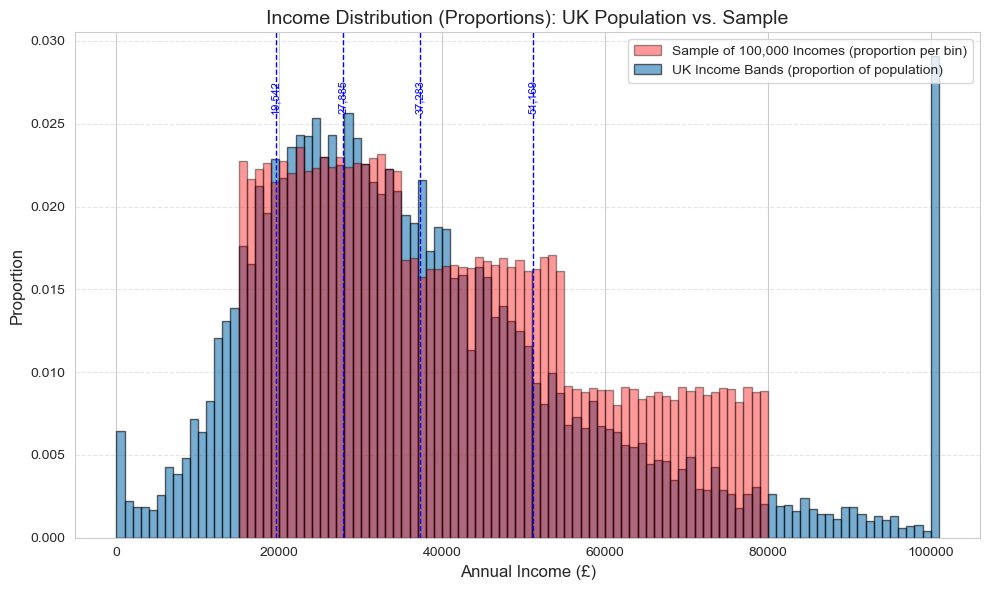

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean the binned data
df_bands = pd.read_csv('Downloads/income_band.csv')
df_bands['income_band'] = (
    df_bands['Income band']
      .astype(str)
      .str.replace('[£,]', '', regex=True)
      .astype(float)
      .astype(int)
)

df_bands['midpoint'] = df_bands['income_band'] + 500
df_bands['band_width'] = 1000

# Normalize the frequencies to get proportions
total_freq = df_bands['Frequency'].sum()
df_bands['proportion'] = df_bands['Frequency'] / total_freq

# Construct bin edges
lower_bounds = sorted(df_bands['income_band'].unique())
last_edge = lower_bounds[-1] + 1000
bin_edges = lower_bounds + [last_edge]

# Load and clean the 100k sample data
df_ind = robust

# Quintile transition points
quintile_points = [19542, 27885, 37283, 51169]

# Plot both distributions as proportions
plt.figure(figsize=(10, 6))

# Bar plot of proportion-based income bands
plt.bar(
    df_bands['midpoint'],
    df_bands['proportion'],
    width=df_bands['band_width'],
    align='center',
    alpha=0.6,
    edgecolor='black',
    label='UK Income Bands (proportion of population)'
)

# Histogram of sample incomes, using proportion per bin
n, bins, patches = plt.hist(
    df_ind['income'],
    bins=bin_edges,
    weights=np.ones(len(df_ind)) / len(df_ind),  # each entry counts as 1/N
    alpha=0.4,
    edgecolor='black',
    color='red',
    label='Sample of 100,000 Incomes (proportion per bin)'
)

# Draw vertical lines at quintile transition points
for qp in quintile_points:
    plt.axvline(qp, color='blue', linestyle='--', linewidth=1)

# Optional: label each quintile line near the top
y_max = max(df_bands['proportion'].max(), n.max())
for qp in quintile_points:
    plt.text(qp, y_max * 0.95, f'{qp:,}', rotation=90, va='top', ha='center', fontsize=8, color='blue')

plt.xlabel('Annual Income (£)')
plt.ylabel('Proportion')
plt.title('Income Distribution (Proportions): UK Population vs. Sample')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [34]:
def plot_two_group_nested(series_robust: pd.Series,
                          series_initial: pd.Series,
                          xlabel: str,
                          title: str):
    """
    Plot two big clusters: [Robust | Initial]. Within each cluster, draw one bar per category.
    series_robust   : Pandas Series (index = categories, values = P(category | ... ) from robust)
    series_initial  : Pandas Series (same index = categories, values = P(category | ...) from initial)
    xlabel          : label for the x‐axis
    title           : plot title
    """
    # 1) Reindex initial → robust (fill missing with 0)
    series_initial = series_initial.reindex(series_robust.index, fill_value=0)

    categories = series_robust.index.map(str)
    n = len(categories)
    # Use a distinct color for each category (tab20 can handle up to 20)
    colors = plt.cm.tab20.colors[:n]

    width = 0.8     # bar width
    gap = 1.0       # gap (in “x‐units”) between the two clusters

    # 2) Compute x‐positions for each bar:
    #    - Robust bars at [0, 1, 2, …, n−1]
    #    - Initial bars at [n + gap, (n+gap)+1, …, (n+gap)+(n−1)]
    rob_positions  = np.arange(n)
    init_positions = rob_positions + n + gap

    plt.figure(figsize=(max(6, n * 0.3 + 2), 4))

    # 3) Plot each category as a separate color
    for i, cat in enumerate(categories):
        # Robust bar
        plt.bar(rob_positions[i],
                series_robust.iloc[i],
                width=width,
                color=colors[i],
                edgecolor='black')
        # Initial bar
        plt.bar(init_positions[i],
                series_initial.iloc[i],
                width=width,
                color=colors[i],
                edgecolor='black')

    # 4) Prepare legend: plot invisible bars just to get color/labels in legend
    for i, cat in enumerate(categories):
        plt.bar([], [], color=colors[i], label=cat, edgecolor='black')

    # 5) Place x‐ticks at cluster centers: (0 + (n−1)/2) for “Robust”, (n+gap)+(n−1)/2 for “Initial”
    center_rob  = rob_positions.mean()
    center_init = init_positions.mean()
    plt.xticks([center_rob, center_init], ['Robust', 'Initial'])

    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [38]:
# LATEST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_two_group_nested(series_robust: pd.Series,
                          series_initial: pd.Series,
                          xlabel: str,
                          title: str):
    """
    Plot two big clusters: [Robust | Initial]. Within each cluster, draw one bar per category.
    series_robust   : Pandas Series (index = categories, values = P(category | ... ) from robust)
    series_initial  : Pandas Series (same index = categories, values = P(category | ...) from initial)
    xlabel          : label for the x‐axis
    title           : plot title
    """
    # 1) Reindex initial → robust (fill missing with 0)
    series_initial = series_initial.reindex(series_robust.index, fill_value=0)

    categories = series_robust.index.map(str)
    n_categories = len(categories)

    # Use a distinct color for each category (tab20 can handle up to 20)
    colors = plt.cm.tab20.colors[:n_categories]

    # Define the width for EACH bar (e.g., 0.2 units for each category bar)
    bar_width = 0.2 # Each individual bar will have this width
    
    # Calculate the total width of one sub-group of bars (e.g., all age groups for 'Robust')
    total_group_width = n_categories * bar_width
    
    # Define the gap between the two main groups ("Robust" and "Initial")
    gap_between_groups = 0.5 # A fixed gap in x-units

    # Calculate the starting X position for the "Robust" group of bars
    # This centers the entire block of `n_categories` bars at a relative position.
    robust_group_start_x = 0 - (total_group_width / 2) # Start slightly left to center later
    
    # Calculate the starting X position for the "Initial" group of bars
    initial_group_start_x = robust_group_start_x + total_group_width + gap_between_groups


    # Set up the figure size. Adjust `n_categories * 0.5` based on how wide you want each overall group.
    plt.figure(figsize=(max(8, n_categories * bar_width * 3 + 2), 6)) # Increased base size for better spacing

    # To collect handles and labels for the legend
    # We will collect one handle per category
    legend_handles = []
    legend_labels = []

    # 3) Plot each category as a separate color
    for i, cat in enumerate(categories):
        # Calculate the specific x-position for this category's bar within its group
        # This will place bars side-by-side.
        x_offset_within_group = i * bar_width

        # Robust bar
        x_rob = robust_group_start_x + x_offset_within_group
        bar_rob = plt.bar(x_rob,
                          series_robust.iloc[i],
                          width=bar_width,
                          color=colors[i],
                          edgecolor='black',
                          label=cat) # IMPORTANT: Pass label here for each category

        # Initial bar
        x_init = initial_group_start_x + x_offset_within_group
        plt.bar(x_init,
                series_initial.iloc[i],
                width=bar_width,
                color=colors[i],
                edgecolor='black')
        
        # Collect only one handle for the legend for each category
        # Since 'label' is passed to the first plt.bar call for this category,
        # plt.legend() will automatically pick it up correctly.
        # We don't need to manually build legend_handles/labels with this approach
        # unless there's a specific need to customize the legend further.

    # 5) Place x‐ticks for the main "Robust" and "Initial" labels
    # These labels should be centered under their respective blocks of bars
    center_rob_group = robust_group_start_x + (total_group_width / 2) - (bar_width / 2)
    center_init_group = initial_group_start_x + (total_group_width / 2) - (bar_width / 2)
    
    # The previous calculation for centers was rob_positions.mean() which assumed each category was a separate tick.
    # Now we have groups of bars. The centers need to reflect the center of these groups.
    # A simpler way is just to pick a reasonable aesthetic center for the main tick labels
    
    # Let's use simpler fixed positions for the main group labels if they are visually centered
    # For example, if robust_group_start_x is 0, and total_group_width is X, then center is X/2
    
    # Recalculate robust_group_start_x and initial_group_start_x based on a cleaner centering for ticks
    # This aligns the tick marks with the logical center of each bar group
    
    # x-positions for the overall group labels
    tick_pos_robust = (robust_group_start_x + (robust_group_start_x + total_group_width)) / 2
    tick_pos_initial = (initial_group_start_x + (initial_group_start_x + total_group_width)) / 2

    plt.xticks([tick_pos_robust, tick_pos_initial], ['Robust', 'Initial'])

    plt.xlabel(xlabel)
    plt.ylabel('Probability')
    plt.title(title)
    
    # Automatically generate legend from labels provided in plt.bar
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()


/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/1450568649.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/1450568649.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_region_initial = cond_tenure_region_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/1450568649.py:37: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/1450568649.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_age_tenure_initial = cond_age_tenure_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/1450568649.py:47:

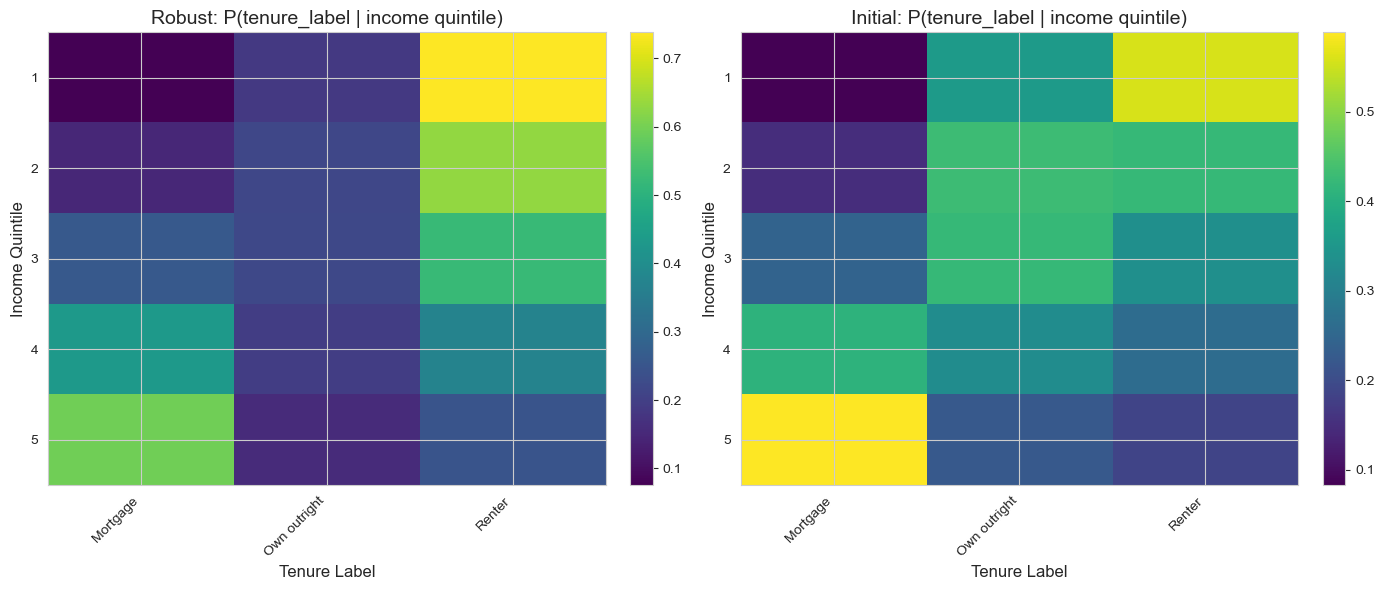

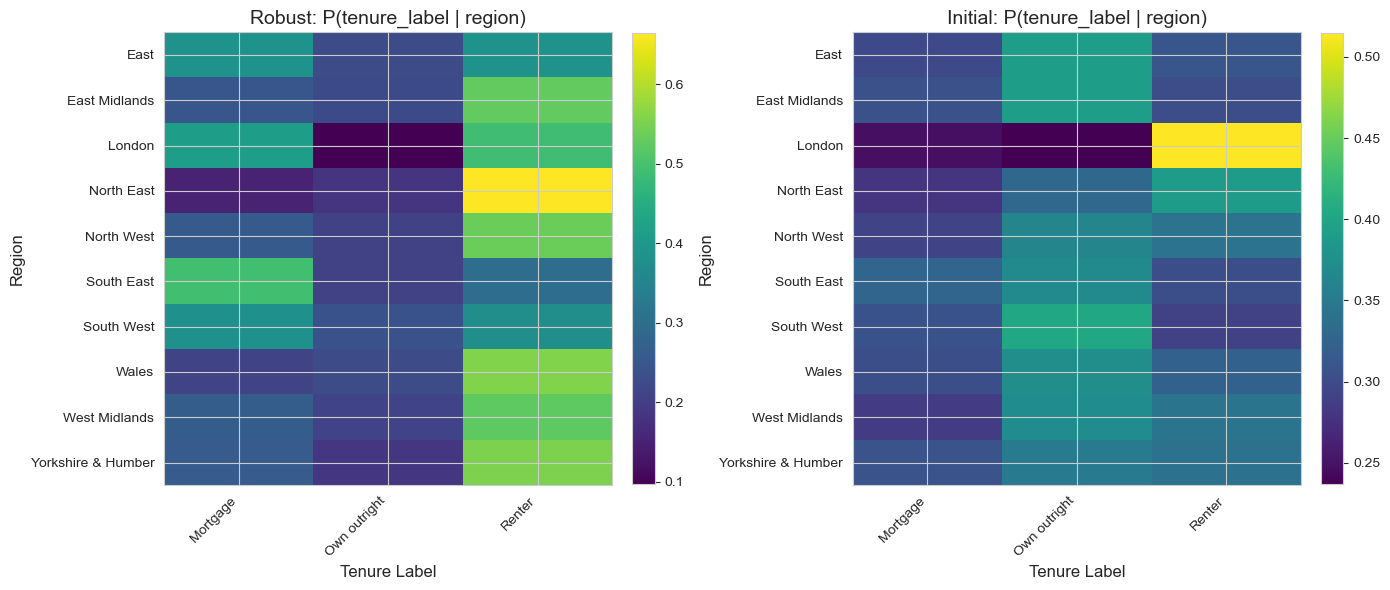

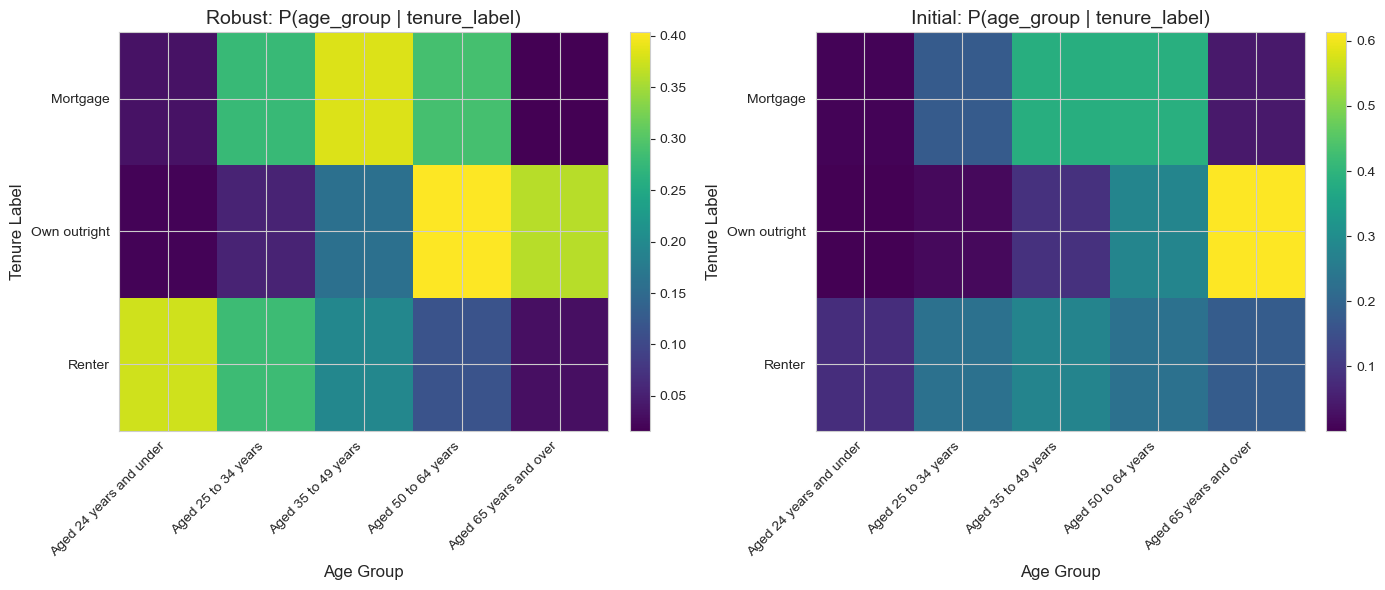

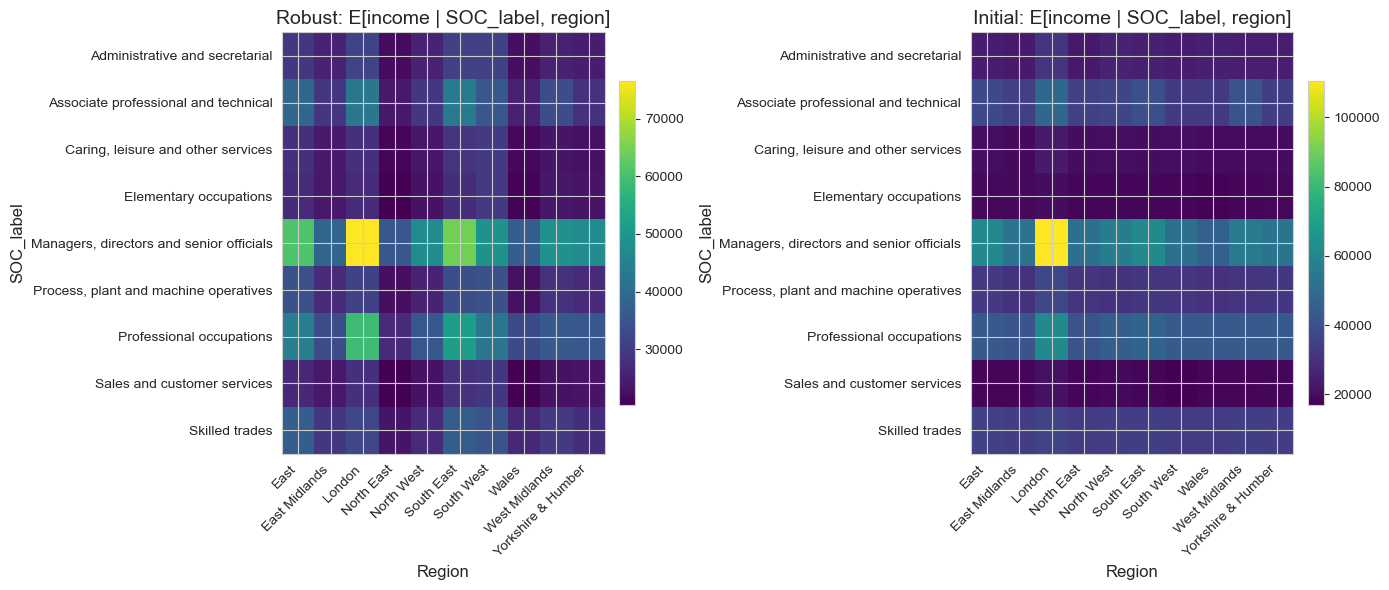

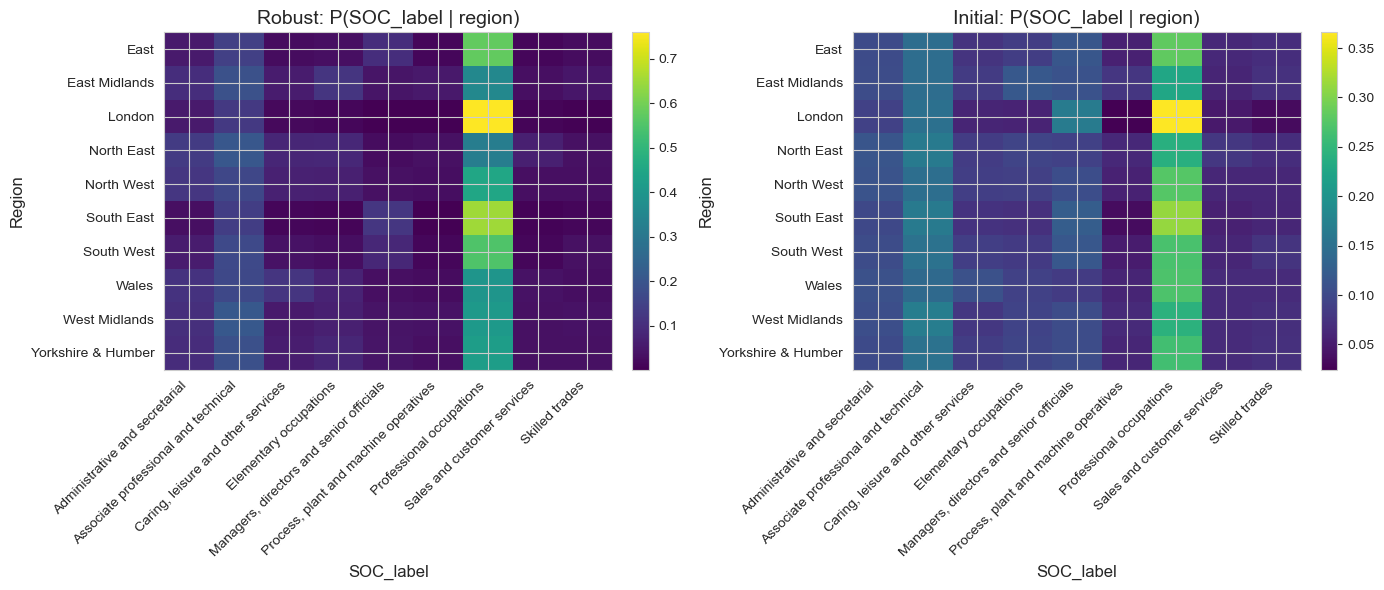

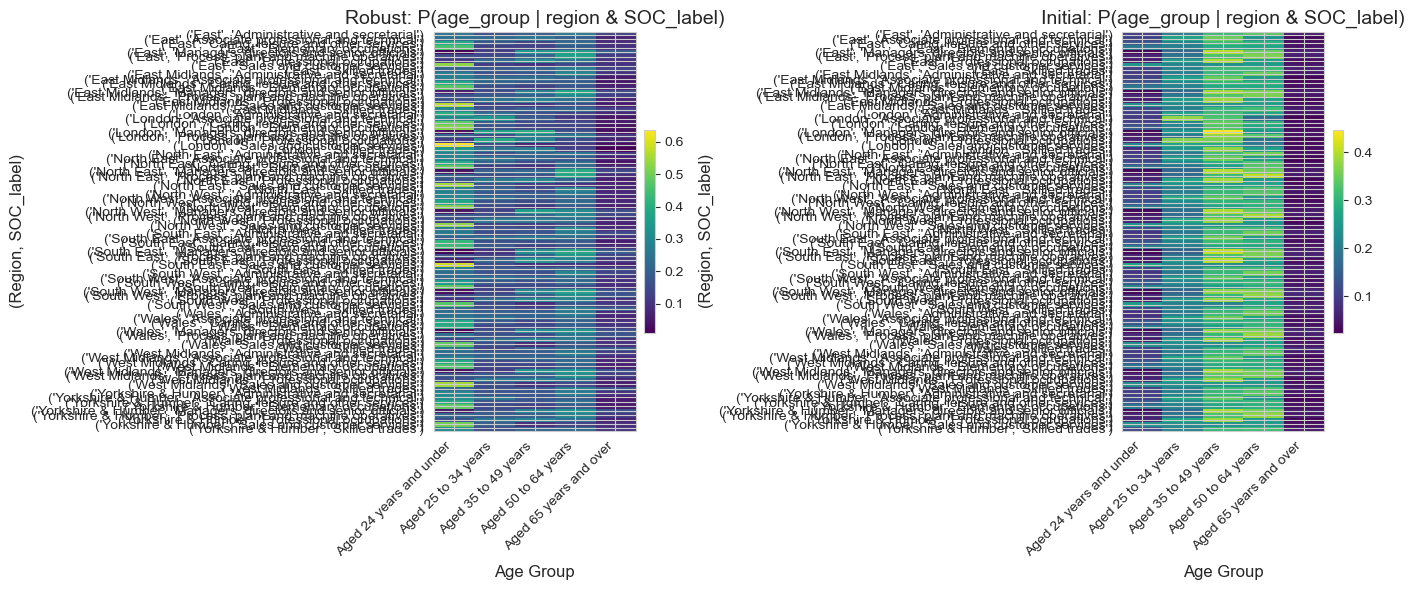

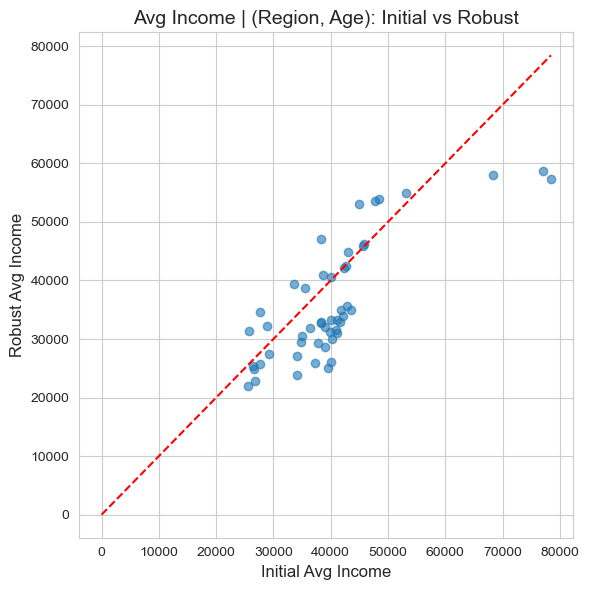

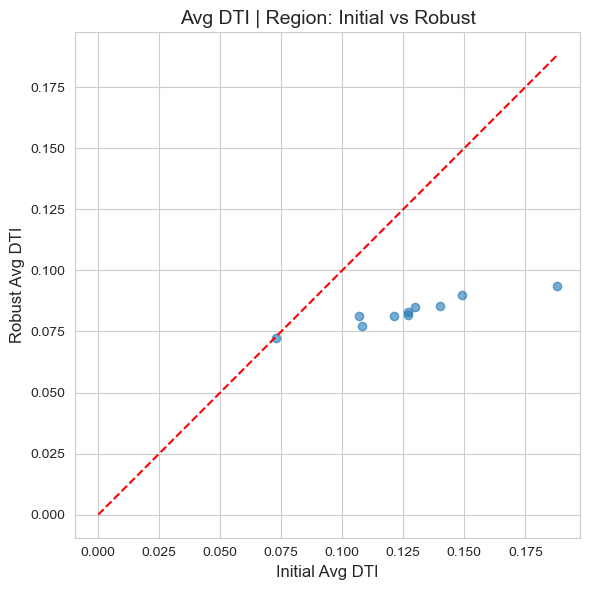

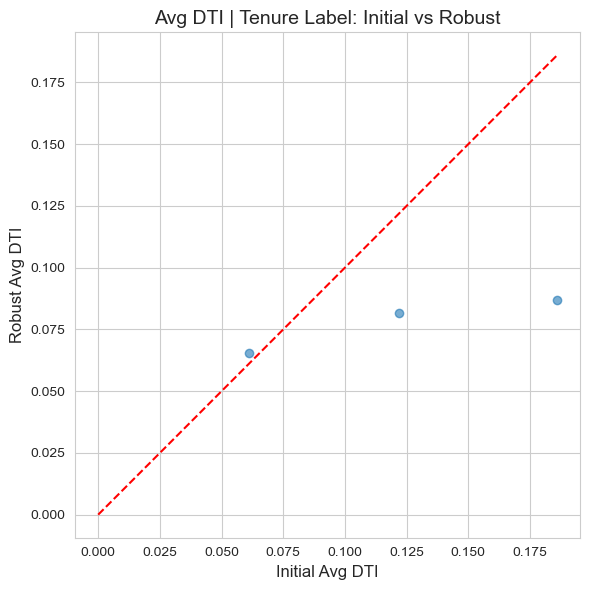

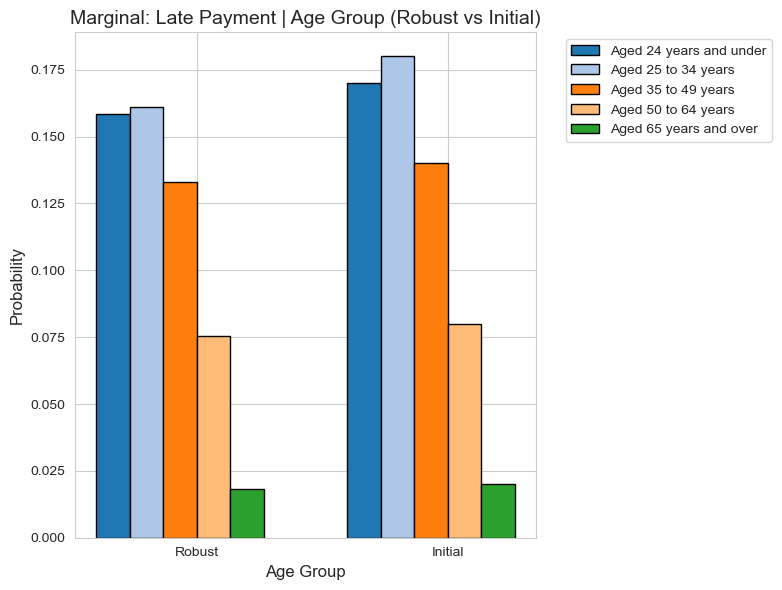

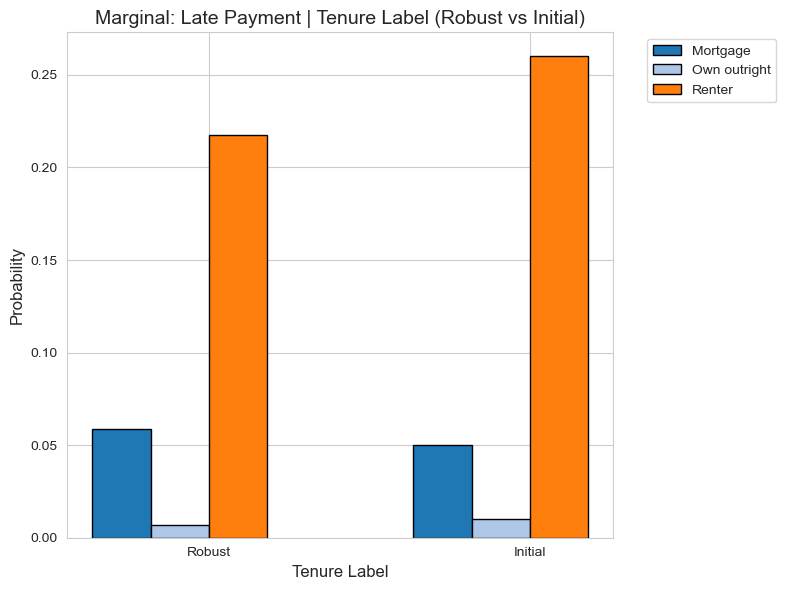

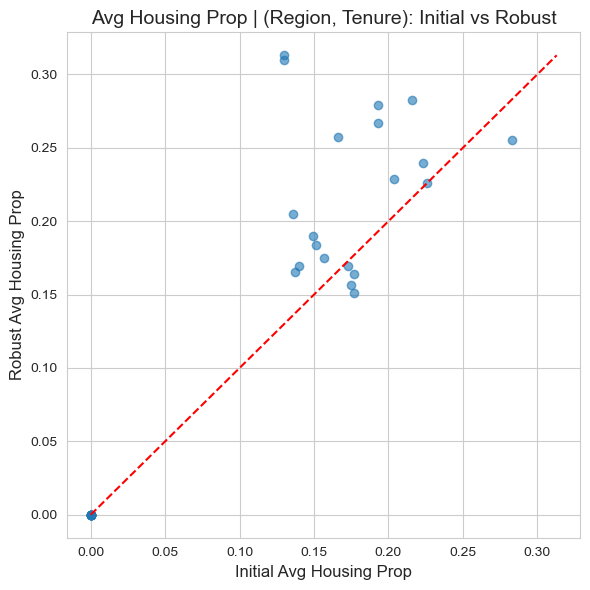

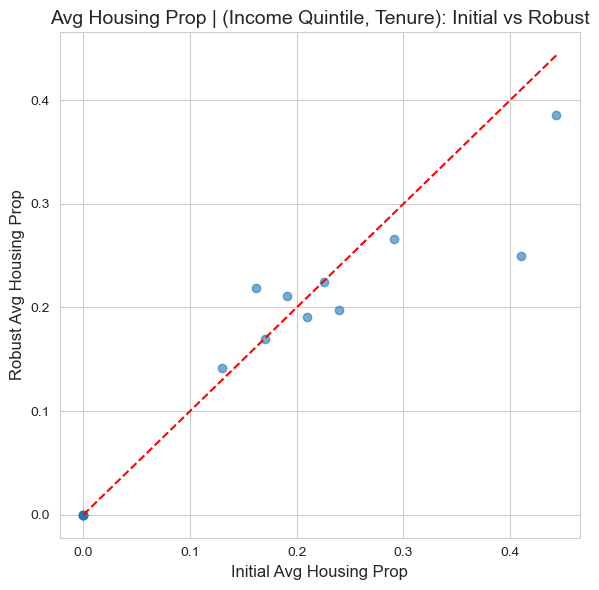

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ─────────────────────────────────────────────────────────────────────────────
# Helper: Clean a pandas Series of “dirty” strings (commas, '%', whitespace) → floats
# ─────────────────────────────────────────────────────────────────────────────
def clean_and_numeric(series: pd.Series) -> pd.Series:
    """
    Convert a Series containing strings like '12,345' or '89%' into numeric floats.
    Non-convertible values become NaN.
    """
    s = (series
         .astype(str)
         .str.replace(',', '',  regex=False)
         .str.replace('%', '',  regex=False)
         .str.strip()
    )
    return pd.to_numeric(s, errors='coerce')


# ─────────────────────────────────────────────────────────────────────────────
# 1) Ensure all “initial” conditional DataFrames are numeric
# ─────────────────────────────────────────────────────────────────────────────

# 1.a) cond_tenure_inc5_initial: index=income quintile, columns=tenure_label
cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.b) cond_tenure_region_initial: index=region, columns=tenure_label
cond_tenure_region_initial = cond_tenure_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.c) cond_tenure_incQ_initial: index=incQ (treat as income quintile), columns=tenure_label
cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.d) cond_age_tenure_initial: index=tenure_label, columns=age_group
cond_age_tenure_initial = cond_age_tenure_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.e) cond_soc_region_initial: index=region, columns=SOC_label
cond_soc_region_initial = cond_soc_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)


# ─────────────────────────────────────────────────────────────────────────────
# 2) Define helper to plot a pair of heatmaps (robust vs initial)
# ─────────────────────────────────────────────────────────────────────────────
def plot_heatmap_pair(df_robust: pd.DataFrame,
                      df_initial: pd.DataFrame,
                      x_label: str,
                      y_label: str,
                      title_rob: str,
                      title_init: str):
    """
    Display two side‐by‐side heatmaps: one for df_robust, one for df_initial.
    Both DataFrames must have the same index/columns (or will be reindexed).
    
    df_robust  : DataFrame(index=conditioning, columns=outcome, values=P(outcome|cond))
    df_initial : same shape; may have different index/columns.
    x_label    : label for horizontal axis (outcomes)
    y_label    : label for vertical axis (conditioning categories)
    title_rob  : title for robust heatmap
    title_init : title for initial heatmap
    """
    # 1) Align df_initial → df_robust
    df_init_aligned = df_initial.reindex(
        index=df_robust.index,
        columns=df_robust.columns,
        fill_value=0
    )
    
    data_rob  = df_robust.values
    data_init = df_init_aligned.values
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    im0 = axes[0].imshow(data_rob, aspect='auto', cmap='viridis')
    axes[0].set_xticks(np.arange(len(df_robust.columns)))
    axes[0].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[0].set_yticks(np.arange(len(df_robust.index)))
    axes[0].set_yticklabels(df_robust.index)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    axes[0].set_title(title_rob)
    fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
    
    im1 = axes[1].imshow(data_init, aspect='auto', cmap='viridis')
    axes[1].set_xticks(np.arange(len(df_robust.columns)))
    axes[1].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[1].set_yticks(np.arange(len(df_robust.index)))
    axes[1].set_yticklabels(df_robust.index)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    axes[1].set_title(title_init)
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    
    
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 3) Alternative: “facet bar charts” for one conditional as example
#    (Optional; comment out if not needed)
# ─────────────────────────────────────────────────────────────────────────────
def plot_facet_bars(cond_robust: pd.DataFrame,
                    cond_initial: pd.DataFrame,
                    cond_label: str,
                    outcome_label: str,
                    figsize_per_facet=(3, 3)):
    """
    For each conditioning category, draw a small bar chart showing robust vs initial
    distribution over outcomes. Plots are arranged in a grid.
    
    cond_robust  : DataFrame(index=conditioning, columns=outcome)
    cond_initial : DataFrame(index=conditioning, columns=outcome)
    cond_label   : label for conditioning axis (e.g. 'Income Quintile')
    outcome_label: label for outcome axis  (e.g. 'Tenure Label')
    """
    # 1) Align cond_initial → cond_robust
    cond_initial = cond_initial.reindex(
        index=cond_robust.index,
        columns=cond_robust.columns,
        fill_value=0
    )
    
    categories = list(cond_robust.index.astype(str))
    outcomes   = list(cond_robust.columns.astype(str))
    n_cats     = len(categories)
    
    # Determine grid size (roughly square)
    n_cols = int(np.ceil(np.sqrt(n_cats)))
    n_rows = int(np.ceil(n_cats / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(n_cols * figsize_per_facet[0],
                                      n_rows * figsize_per_facet[1]),
                             squeeze=False)
    
    for idx, cat in enumerate(categories):
        r = idx // n_cols
        c = idx % n_cols
        ax = axes[r][c]
        
        robust_vals  = cond_robust.loc[cat].values
        initial_vals = cond_initial.loc[cat].values
        x = np.arange(len(outcomes))
        width = 0.35
        
        ax.bar(x - width/2, robust_vals,  width, label='Robust', alpha=0.8)
        ax.bar(x + width/2, initial_vals, width, label='Initial', alpha=0.5)
        ax.set_xticks(x)
        ax.set_xticklabels(outcomes, rotation=45, ha='right')
        ax.set_title(f'{cond_label} = {cat}')
        if r == n_rows - 1:
            ax.set_xlabel(outcome_label)
        if c == 0:
            ax.set_ylabel('Probability')
        ax.legend(fontsize='small')
    
    # Hide any empty subplots
    for idx in range(n_cats, n_rows * n_cols):
        r = idx // n_cols
        c = idx % n_cols
        fig.delaxes(axes[r][c])
    
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 4) Plot all 14 conditional marginals using heatmaps and facet bars
# ─────────────────────────────────────────────────────────────────────────────

# 4.1) P(tenure_label | income quintile)
#      Use heatmap pair
plot_heatmap_pair(
    cond_tenure_inc5_robust,
    cond_tenure_inc5_initial,
    x_label='Tenure Label',
    y_label='Income Quintile',
    title_rob='Robust: P(tenure_label | income quintile)',
    title_init='Initial: P(tenure_label | income quintile)'
)

# (Optional) facet bar chart for the same conditional:
# plot_facet_bars(
#     cond_tenure_inc5_robust,
#     cond_tenure_inc5_initial,
#     cond_label='Income Quintile',
#     outcome_label='Tenure Label'
# )


# 4.2) P(tenure_label | region)
plot_heatmap_pair(
    cond_tenure_region_robust,
    cond_tenure_region_initial,
    x_label='Tenure Label',
    y_label='Region',
    title_rob='Robust: P(tenure_label | region)',
    title_init='Initial: P(tenure_label | region)'
)

# (Optional) facet bar chart:
# plot_facet_bars(
#     cond_tenure_region_robust,
#     cond_tenure_region_initial,
#     cond_label='Region',
#     outcome_label='Tenure Label'
# )


# 4.3) P(tenure_label | income quintile (“incQ”))  ← duplicate of 4.1; skip.


# 4.4) P(age_group | tenure_label) - corrected + heat map
# --- Robust side (unchanged) ---
cond_age_tenure_robust = (
    robust
    .groupby(['tenure_label', 'age_group'])
    .size()
    .div(robust.groupby('tenure_label').size(), level='tenure_label')
    .unstack(fill_value=0)
)
# cond_age_tenure_robust: index = tenure_label, columns = age_group

# --- Initial side: rename columns so “tenure_label” and “age_group” match exactly ---
dfa = breakdown_by_tenure_label_and_age.rename(
    columns={'tenure label': 'tenure_label', 'age group': 'age_group'}
)
tmp = (
    dfa
    .groupby(['tenure_label', 'age_group'])['frequency']
    .sum()
)
cond_age_tenure_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)
# cond_age_tenure_initial: index = tenure_label, columns = age_group

# Now plot side‐by‐side heatmaps
plot_heatmap_pair(
    cond_age_tenure_robust,
    cond_age_tenure_initial,
    x_label='Age Group',
    y_label='Tenure Label',
    title_rob='Robust: P(age_group | tenure_label)',
    title_init='Initial: P(age_group | tenure_label)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_age_tenure_robust,
#     cond_age_tenure_initial,
#     cond_label='Tenure Label',
#     outcome_label='Age Group'
# )


# 4.5) E[income | SOC_label, region] – corrected + heatmap
# --- Robust side (unchanged) ---
avg_income_soc_region_robust = (
    robust
    .groupby(['SOC_label', 'region'])['income']
    .mean()
    .unstack(fill_value=0)
)
# avg_income_soc_region_robust: index = SOC_label, columns = region

# --- Initial side: ensure index = SOC_label, columns = region ---
avg_income_soc_region_initial = breakdown_by_income_and_SOC.copy()

# If “breakdown_by_income_and_SOC” has a column named "SOC_label" but is not already indexed:
if 'SOC_code' in avg_income_soc_region_initial.columns:
    pd.Index.rename('SOC_label', inplace = True)
    avg_income_soc_region_initial = avg_income_soc_region_initial.set_index('SOC_label')

# Now both DataFrames share:
#   index = SOC_label
#   columns = region
plot_heatmap_pair(
    avg_income_soc_region_robust,
    avg_income_soc_region_initial,
    x_label='Region',
    y_label='SOC_label',
    title_rob='Robust: E[income | SOC_label, region]',
    title_init='Initial: E[income | SOC_label, region]'
)


# 4.6) P(SOC_label | region) - corrected + heatmap
# --- Robust side (unchanged) ---
counts_soc_region_robust = (
    robust
    .groupby(['region', 'SOC_label'])
    .size()
    .unstack(fill_value=0)
)
cond_soc_region_robust = counts_soc_region_robust.div(
    counts_soc_region_robust.sum(axis=1), axis=0
)
# cond_soc_region_robust: index = region, columns = SOC_label

# --- Initial side: transpose breakdown_by_region_and_SOC so index=region, columns=SOC_label ---
temp = breakdown_by_region_and_SOC.copy()
# breakdown_by_region_and_SOC currently has index=SOC_label, columns=region
temp = temp.T
# Now: index=region, columns=SOC_label
cond_soc_region_initial = temp.div(temp.sum(axis=1), axis=0)
# cond_soc_region_initial: index=region, columns=SOC_label

plot_heatmap_pair(
    cond_soc_region_robust,
    cond_soc_region_initial,
    x_label='SOC_label',
    y_label='Region',
    title_rob='Robust: P(SOC_label | region)',
    title_init='Initial: P(SOC_label | region)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_soc_region_robust,
#     cond_soc_region_initial,
#     cond_label='Region',
#     outcome_label='SOC_label'
# )


# 4.7) P(age_group | (region, SOC_label)) – corrected + heatmap
# --- Robust side (unchanged) ---
counts_age_region_soc_robust = (
    robust
    .groupby(['region', 'SOC_label', 'age_group'])
    .size()
    .rename('count')
    .reset_index()
)
counts_age_region_soc_robust['cond_prob'] = (
    counts_age_region_soc_robust['count']
    / counts_age_region_soc_robust
        .groupby(['region', 'SOC_label'])['count']
        .transform('sum')
)
cond_age_region_soc_robust = counts_age_region_soc_robust.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_robust: index = (region, SOC_label), columns = age_group

# --- Initial side: rename “age group” → “age_group”, then pivot exactly the same way ---
df = breakdown_by_region_and_SOC_and_age.rename(columns={'age group': 'age_group'})
tmp = df.copy()
tmp['cond_prob'] = (
    tmp['Observation']
    / tmp.groupby(['region', 'SOC_label'])['Observation'].transform('sum')
)
cond_age_region_soc_initial = tmp.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_initial: index = (region, SOC_label), columns = age_group

plot_heatmap_pair(
    cond_age_region_soc_robust,
    cond_age_region_soc_initial,
    x_label='Age Group',
    y_label='(Region, SOC_label)',
    title_rob='Robust: P(age_group | region & SOC_label)',
    title_init='Initial: P(age_group | region & SOC_label)'
)

# 4.8) E[income | (region, age_group)] – scatter
robust_flat2  = avg_income_region_age_robust.stack()
initial_flat2 = avg_income_region_age_initial.stack()
common_idx2   = robust_flat2.index.intersection(initial_flat2.index)

plt.figure(figsize=(6, 6))
plt.scatter(initial_flat2.loc[common_idx2],
            robust_flat2.loc[common_idx2],
            alpha=0.6)
m2 = max(initial_flat2.max(), robust_flat2.max())
plt.plot([0, m2], [0, m2], color='red', linestyle='--')
plt.xlabel('Initial Avg Income')
plt.ylabel('Robust Avg Income')
plt.title('Avg Income | (Region, Age): Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.9) E[dti | region] – scatter
common_idx3 = avg_dti_region_robust.index.intersection(avg_dti_region_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_region_initial.loc[common_idx3],
            avg_dti_region_robust.loc[common_idx3],
            alpha=0.6)
m3 = max(avg_dti_region_initial.max(), avg_dti_region_robust.max())
plt.plot([0, m3], [0, m3], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust Avg DTI')
plt.title('Avg DTI | Region: Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.10) E[dti | tenure_label] – scatter
common_idx4 = avg_dti_tenure_robust.index.intersection(avg_dti_tenure_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_tenure_initial.loc[common_idx4],
            avg_dti_tenure_robust.loc[common_idx4],
            alpha=0.6)
m4 = max(avg_dti_tenure_initial.max(), avg_dti_tenure_robust.max())
plt.plot([0, m4], [0, m4], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust Avg DTI')
plt.title('Avg DTI | Tenure Label: Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.11) P(late=1 | age_group) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_age,
    series_initial = late_by_age_initial,
    xlabel         = 'Age Group',
    title          = 'Marginal: Late Payment | Age Group (Robust vs Initial)'
)


# 4.12) P(late=1 | tenure_label) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_tenure,
    series_initial = late_by_tenure_initial,
    xlabel         = 'Tenure Label',
    title          = 'Marginal: Late Payment | Tenure Label (Robust vs Initial)'
)


# 4.13) E[housing_prop | (region, tenure_label)] – scatter
rob_hp_flat  = avg_housing_prop_region_tenure_robust.stack()
init_hp_flat = avg_housing_prop_region_tenure_initial.stack()
common_idx5 = rob_hp_flat.index.intersection(init_hp_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_flat.loc[common_idx5],
            rob_hp_flat.loc[common_idx5],
            alpha=0.6)
m5 = max(init_hp_flat.max(), rob_hp_flat.max())
plt.plot([0, m5], [0, m5], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust Avg Housing Prop')
plt.title('Avg Housing Prop | (Region, Tenure): Initial vs Robust')
plt.tight_layout()
plt.show()


# 4.14) E[housing_prop | (income quintile, tenure_label)] – scatter
rob_hp_i_flat  = avg_housing_prop_inc5_tenure_robust.stack()
init_hp_i_flat = avg_housing_prop_inc5_tenure_initial.stack()
common_idx6    = rob_hp_i_flat.index.intersection(init_hp_i_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_i_flat.loc[common_idx6],
            rob_hp_i_flat.loc[common_idx6],
            alpha=0.6)
m6 = max(init_hp_i_flat.max(), rob_hp_i_flat.max())
plt.plot([0, m6], [0, m6], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust Avg Housing Prop')
plt.title('Avg Housing Prop | (Income Quintile, Tenure): Initial vs Robust')
plt.tight_layout()
plt.show()


In [18]:
robust.groupby('tenure_label').agg({'income':'count'})

income
tenure_label        
Mortgage       35473
Own outright   19273
Renter         45254

In [13]:
robust

Unnamed: 0    income  incQ       dti         region  \
0               0  47387.57     8  0.235342     South West   
1               1  66577.07    10  0.000000           East   
2               2  33240.98     6  0.000000     South East   
3               3  41529.33     7  0.036065     South West   
4               4  56176.13     9  0.000000     South East   
...           ...       ...   ...       ...            ...   
99995       99995  32075.79     5  0.016850     South West   
99996       99996  44287.21     8  0.000000         London   
99997       99997  51767.80     9  0.000000           East   
99998       99998  16043.91     2  0.000000          Wales   
99999       99999  27108.20     4  0.000000  East Midlands   

                                      SOC_label  any_late  \
0                      Professional occupations         0   
1      Managers, directors and senior officials         0   
2                      Professional occupations         0   
3                      Professional occupations         1   
4                      Professional occupations         0   
...                                         ...       ...   
99995                            Skilled trades         1   
99996                  Professional occupations         1   
99997                  Professional occupations         0   
99998                  Professional occupations         0   
99999                    Elementary occupations         0   

                     age_group  income quintile  tenure_label  \
0          Aged 35 to 49 years                4  Own outright   
1       Aged 65 years and over                5  Own outright   
2          Aged 50 to 64 years                3      Mortgage   
3          Aged 35 to 49 years                4        Renter   
4          Aged 25 to 34 years                5      Mortgage   
...                        ...              ...           ...   
99995      Aged 35 to 49 years                3        Renter   
99996      Aged 35 to 49 years                4        Renter   
99997      Aged 50 to 64 years                5  Own outright   
99998      Aged 35 to 49 years                1        Renter   
99999  Aged 24 years and under                2        Renter   

       proportion_of_income_spent_on_housing_cost  housing_cost  \
0                                        0.000000      0.000000   
1                                        0.000000      0.000000   
2                                        0.195703   6505.366694   
3                                        0.194871   8092.882774   
4                                        0.150307   8443.657549   
...                                           ...           ...   
99995                                    0.197121   6322.810632   
99996                                    0.246667  10924.197499   
99997                                    0.000000      0.000000   
99998                                    0.409879   6576.054946   
99999                                    0.279466   7575.817520   

       other essential spending  
0                   2236.884191  
1                   2696.029020  
2                   1523.412928  
3                   1836.865665  
4                   2565.690356  
...                         ...  
99995               1291.596415  
99996               1565.127406  
99997               2508.514107  
99998               1275.844382  
99999               1758.994478  

[100000 rows x 13 columns]

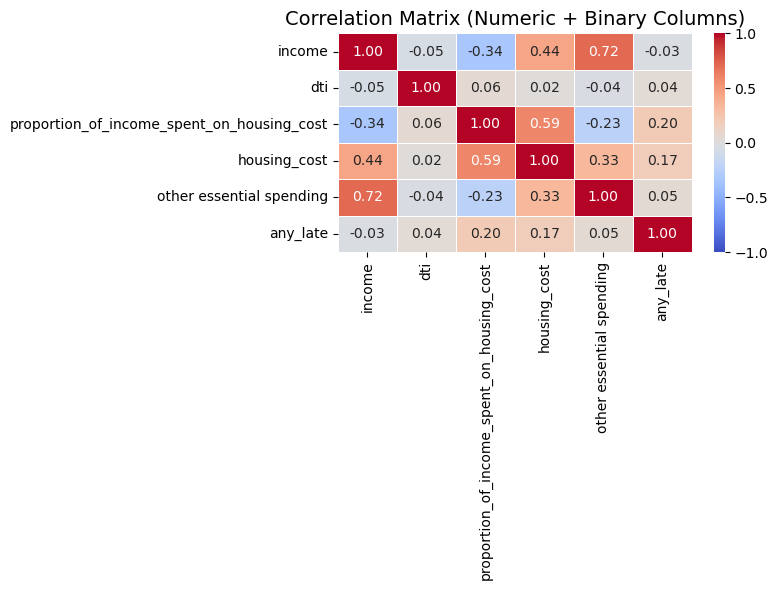

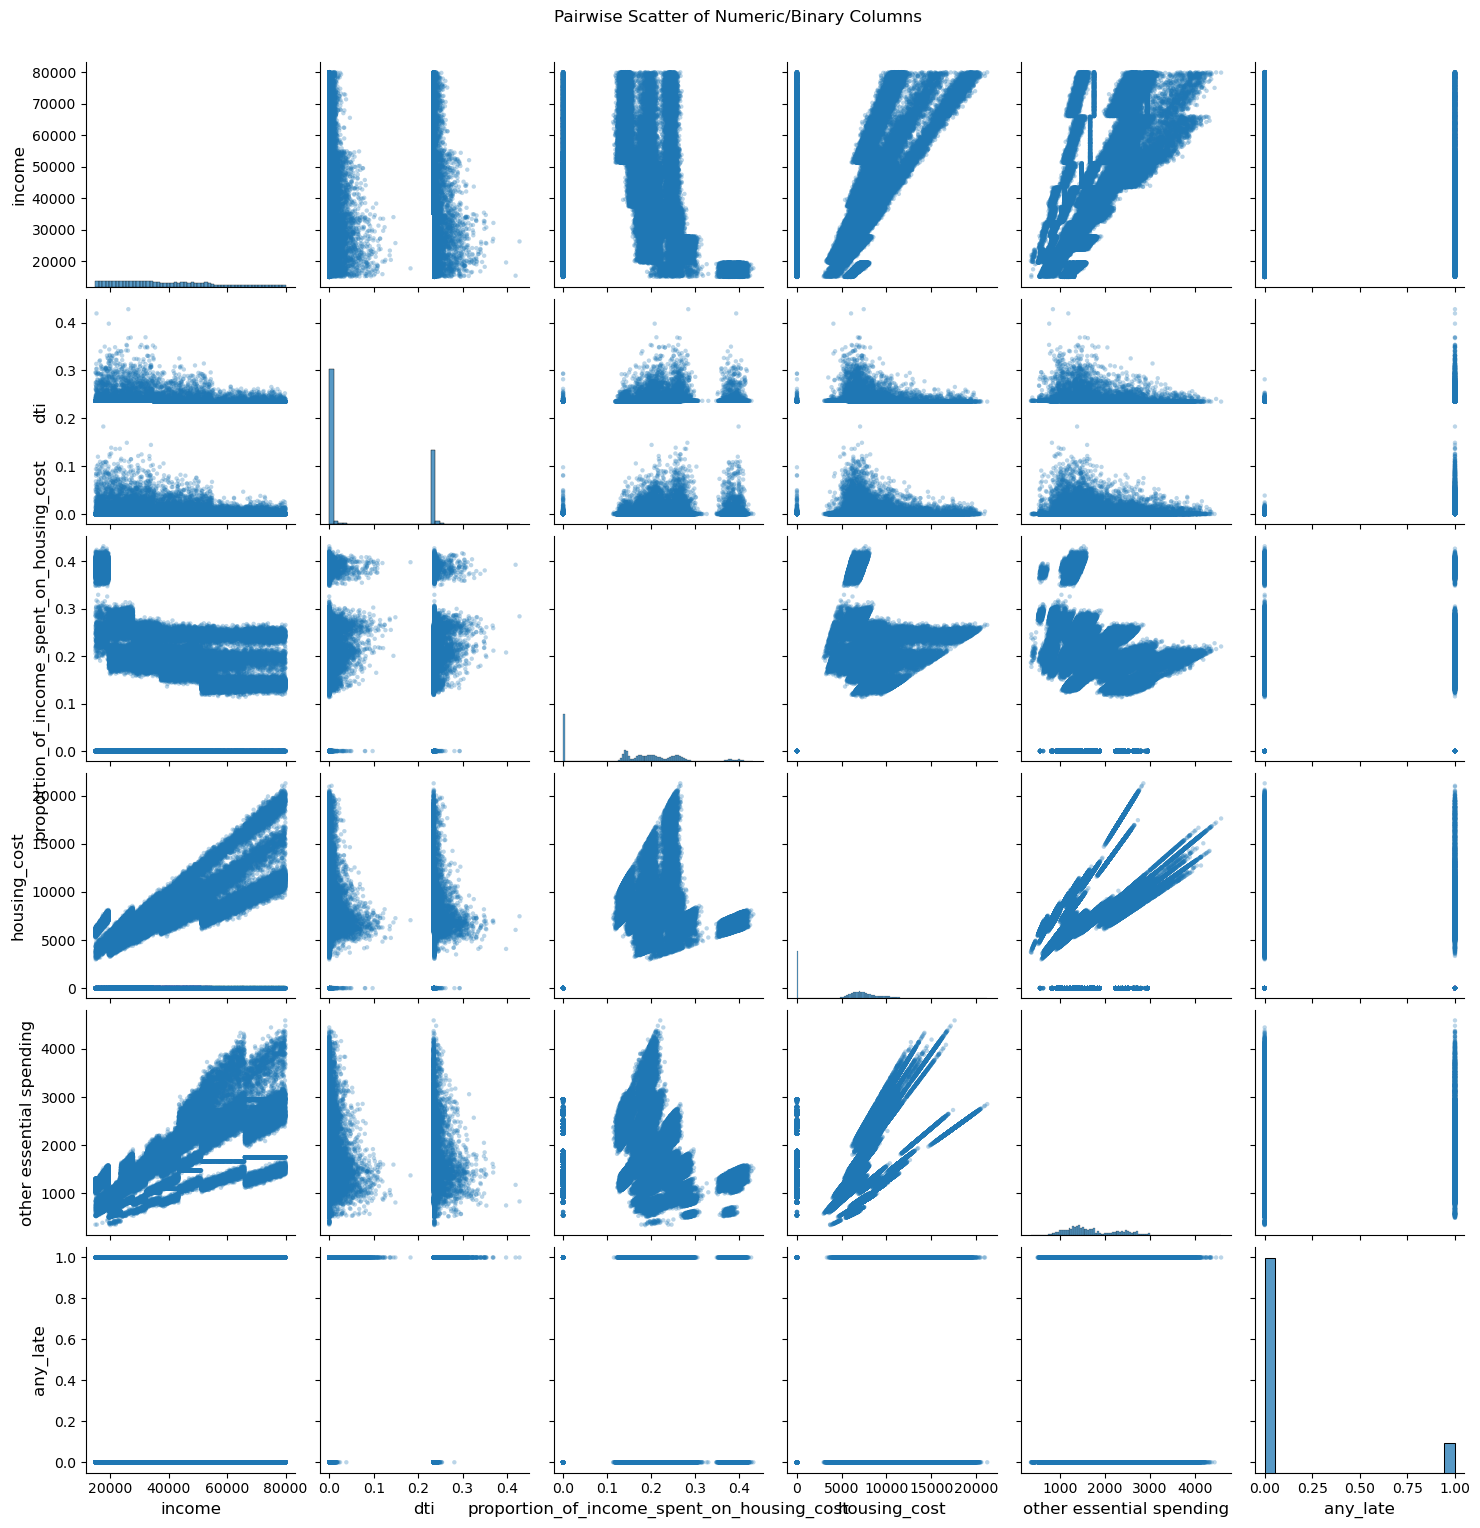

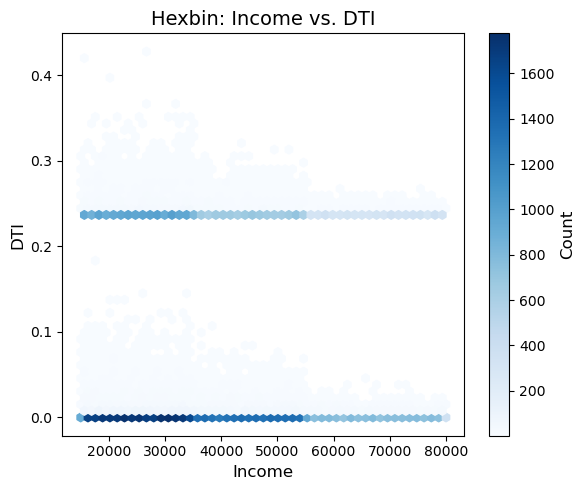

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


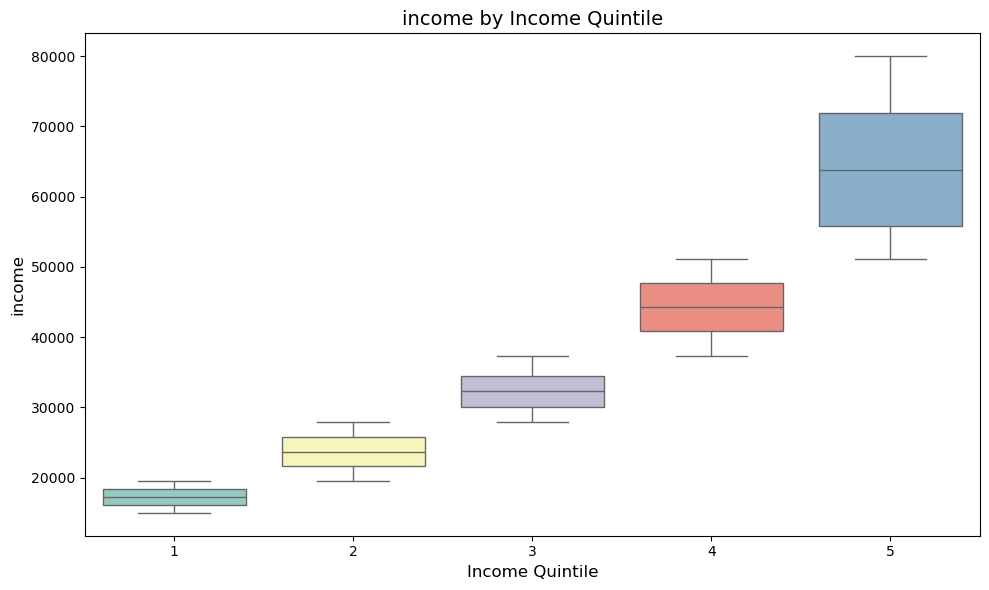

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


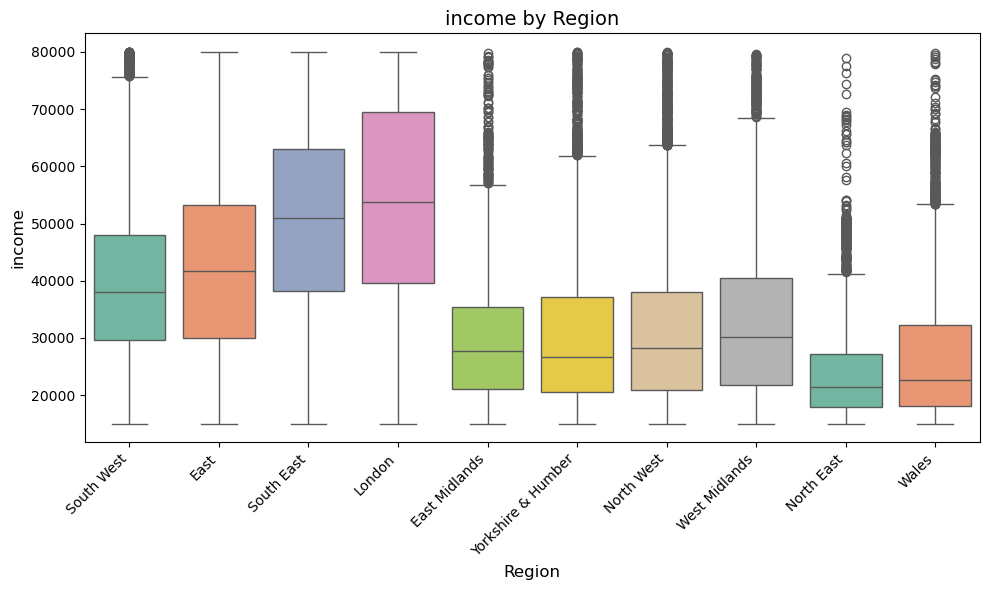

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


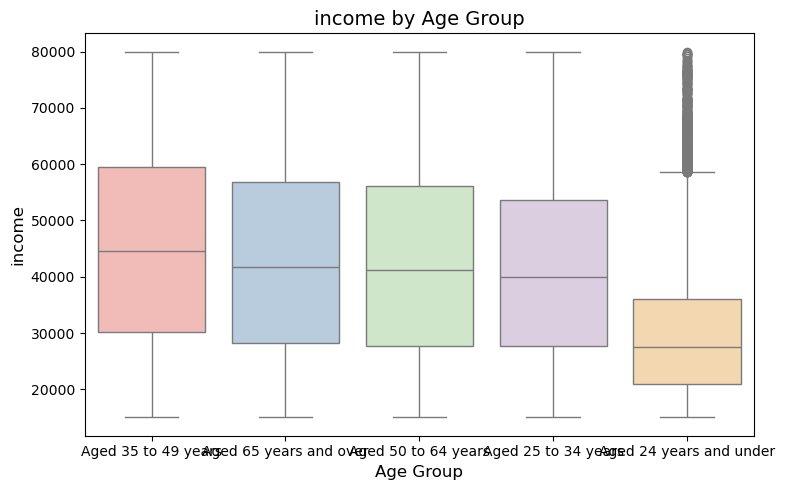

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


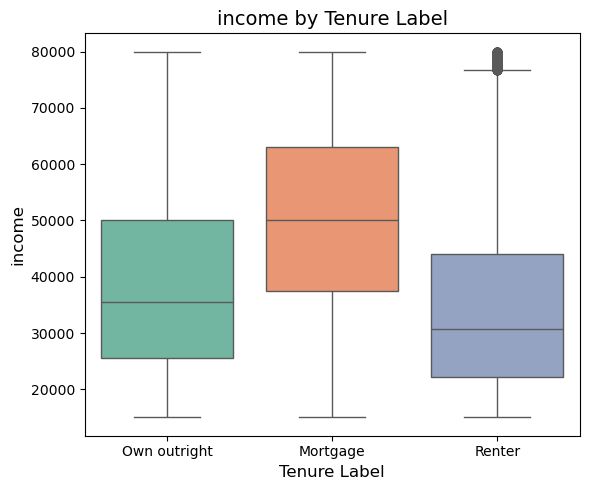

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


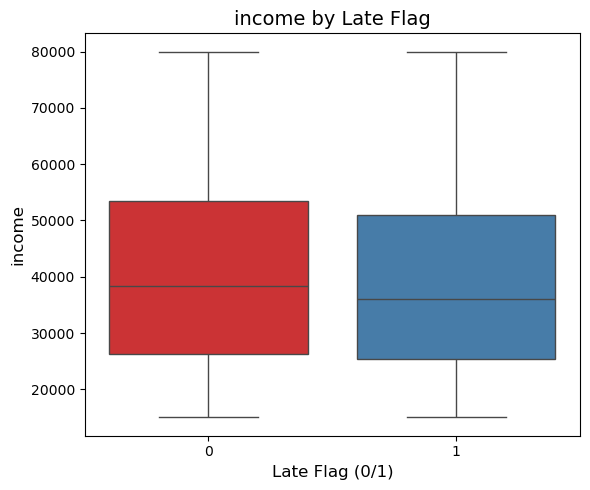

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


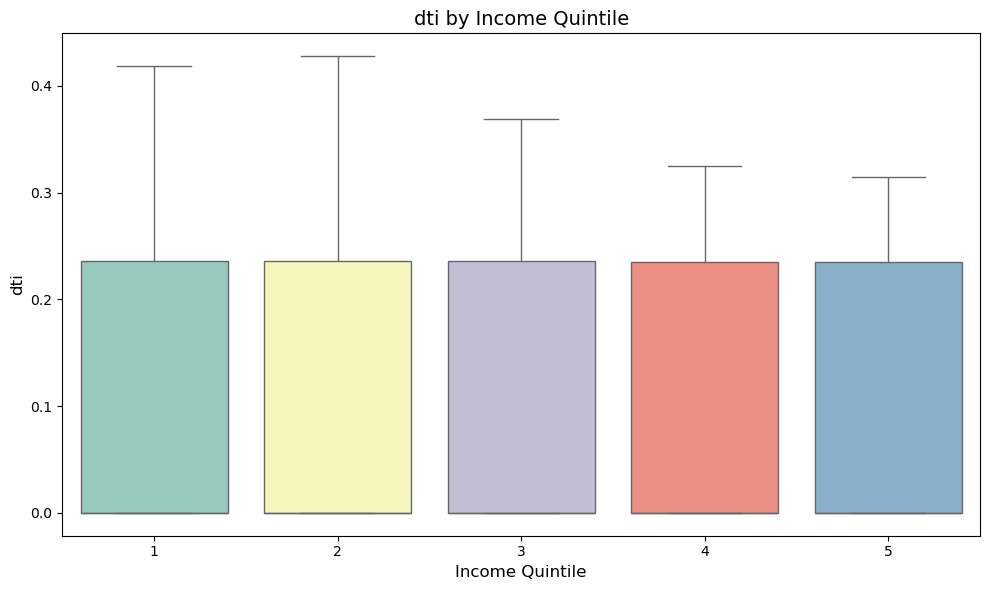

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


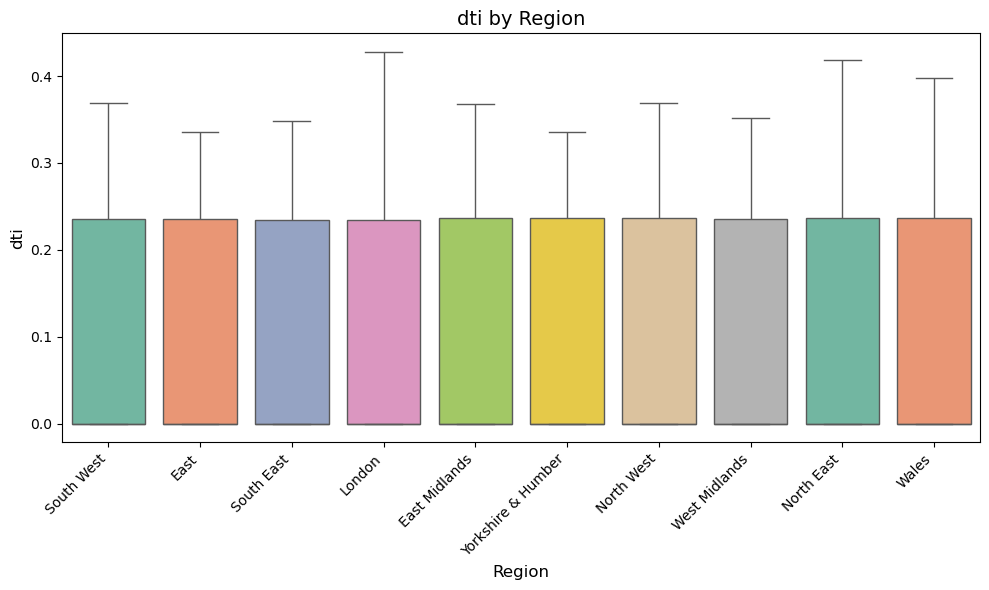

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


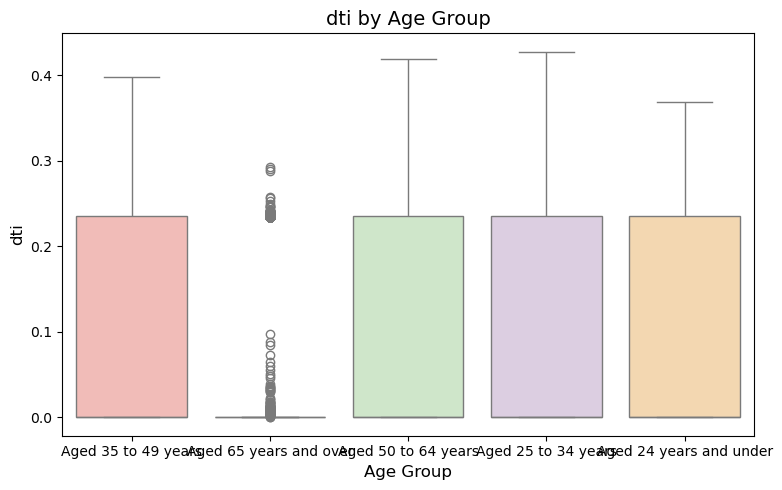

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


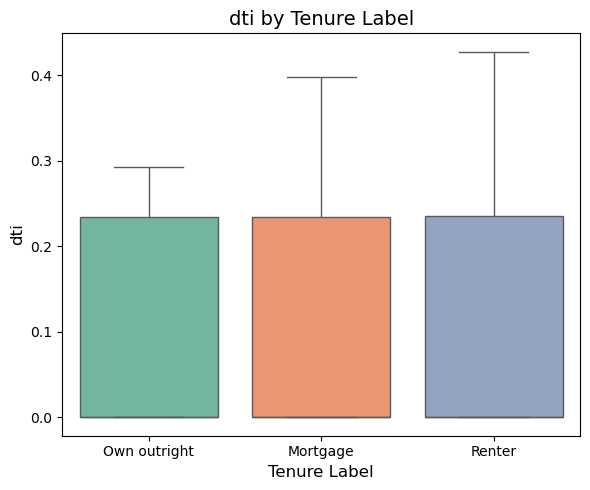

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


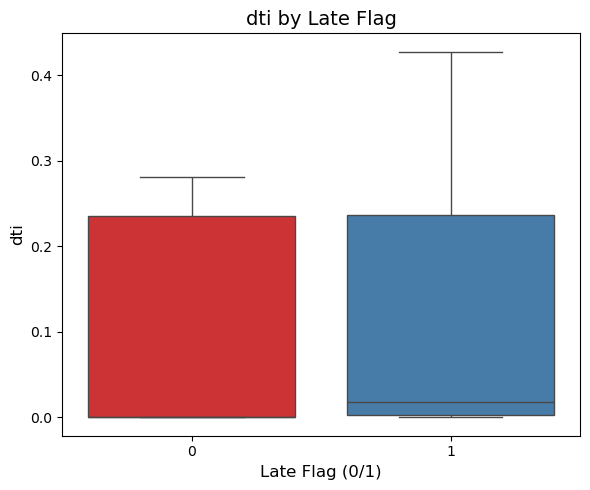

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


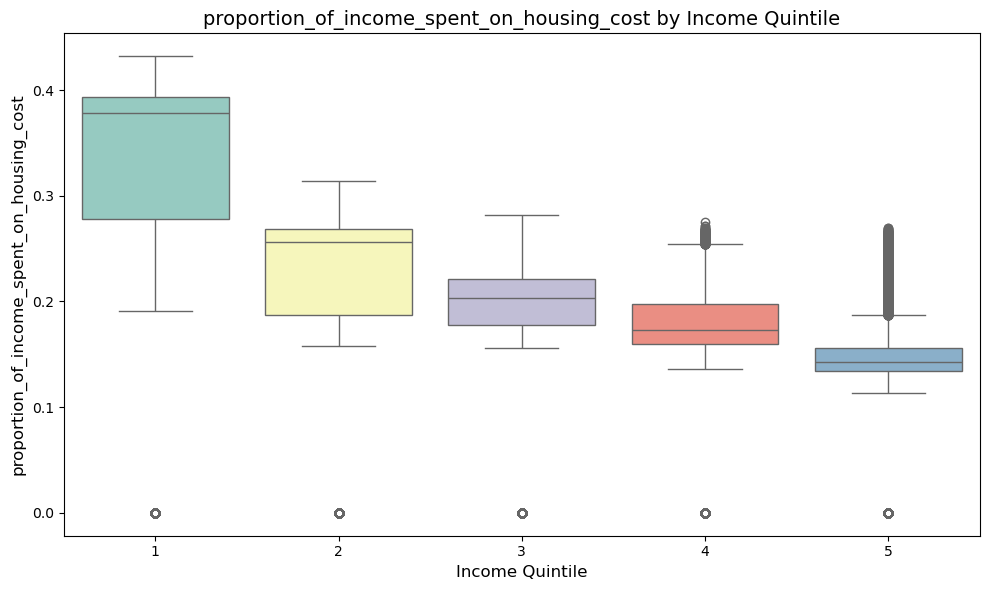

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


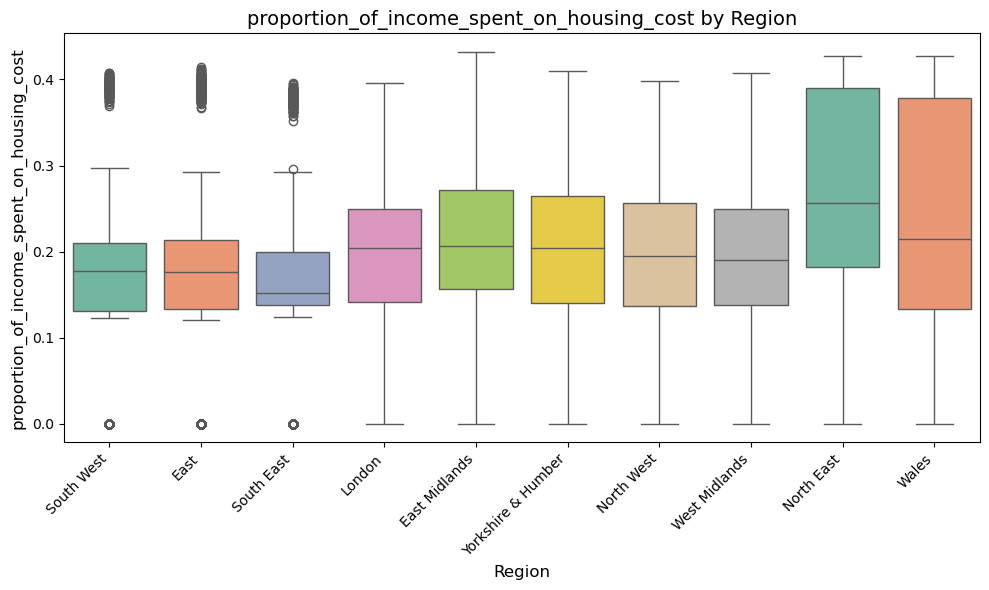

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


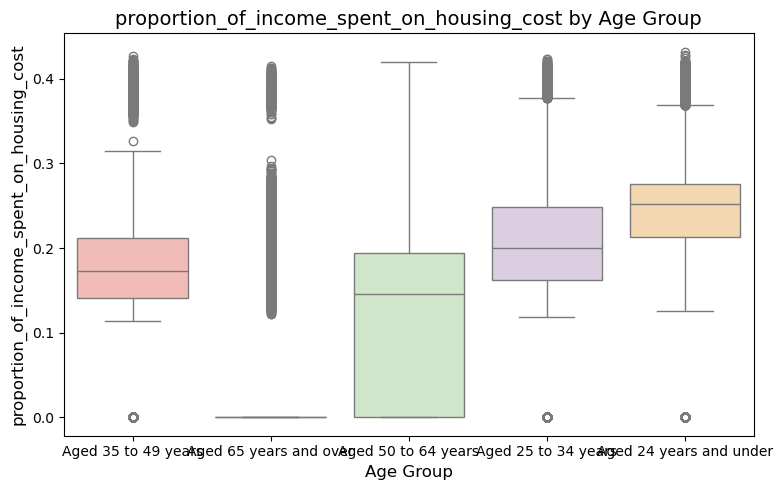

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


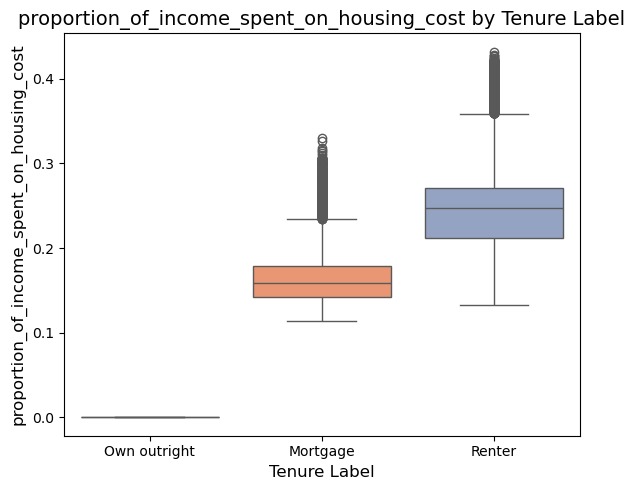

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


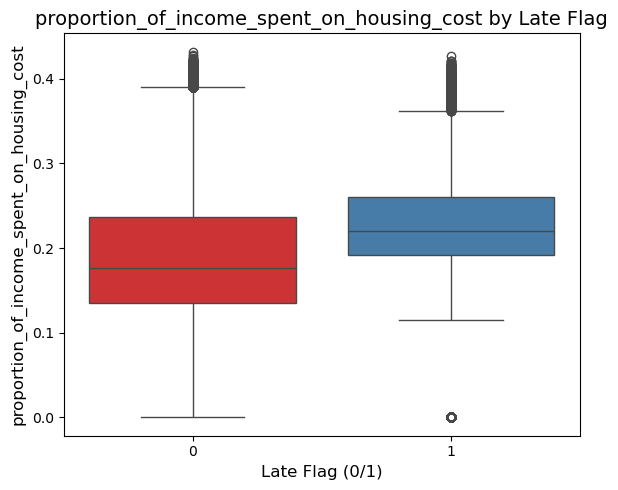

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


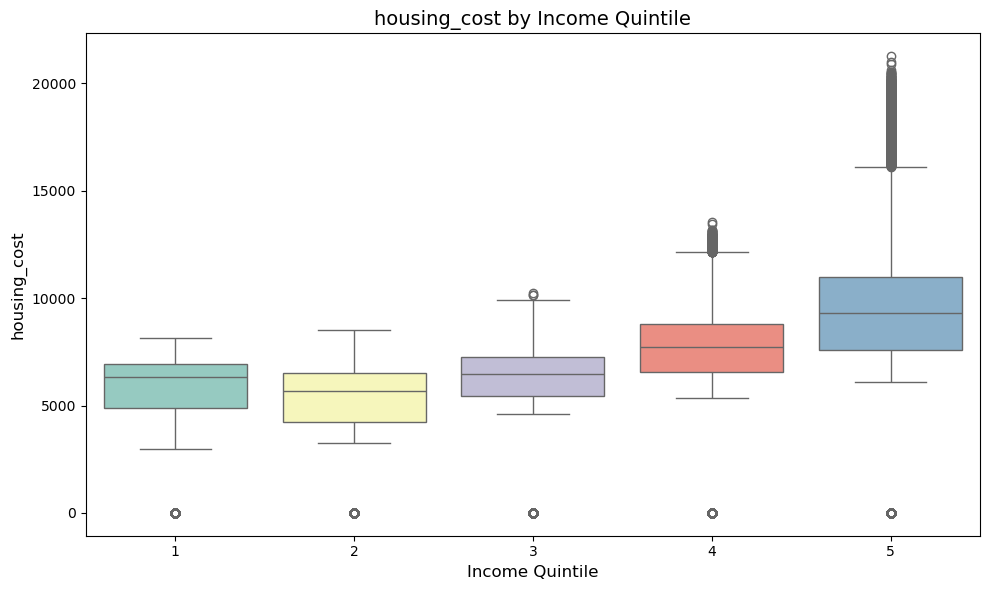

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


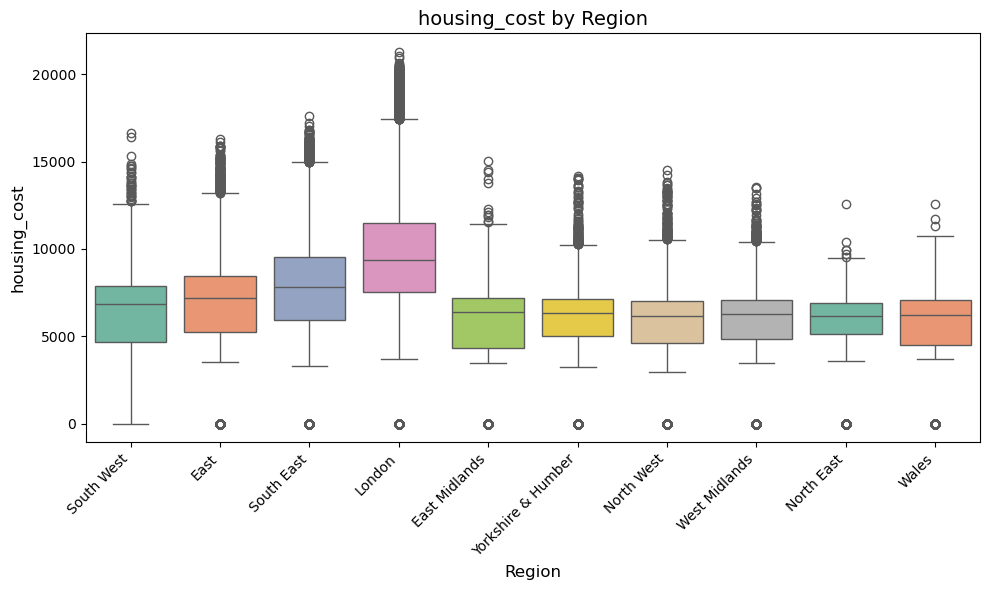

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


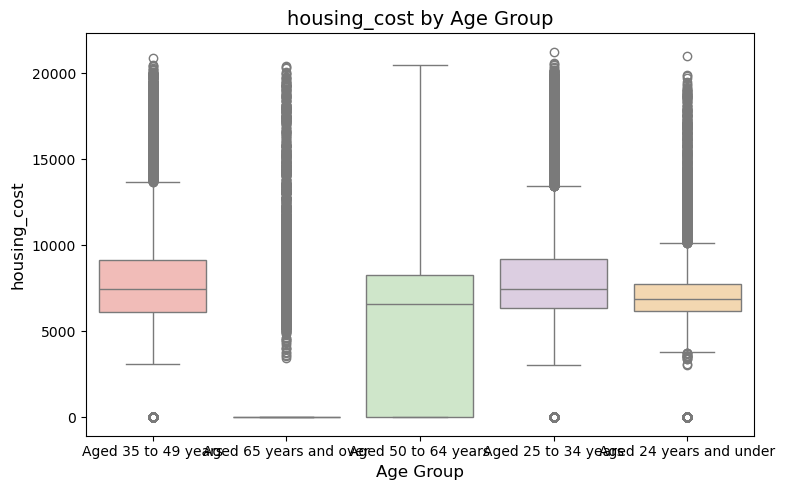

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


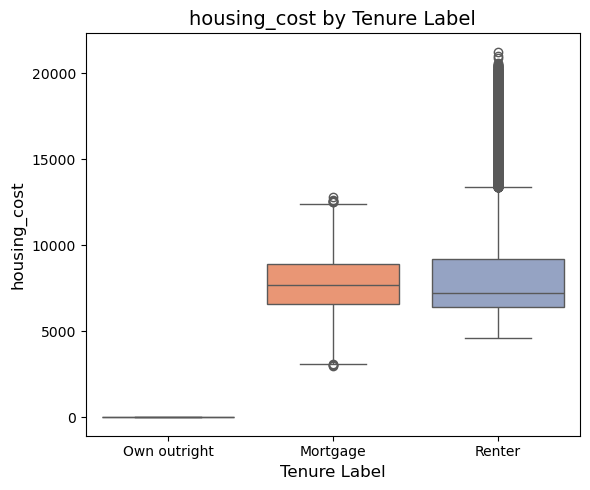

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


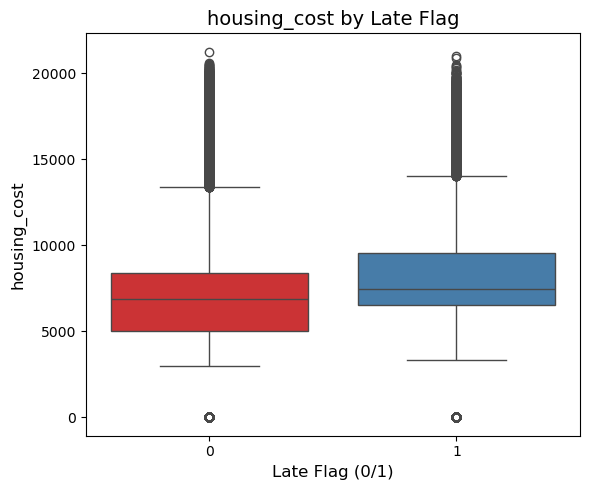

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


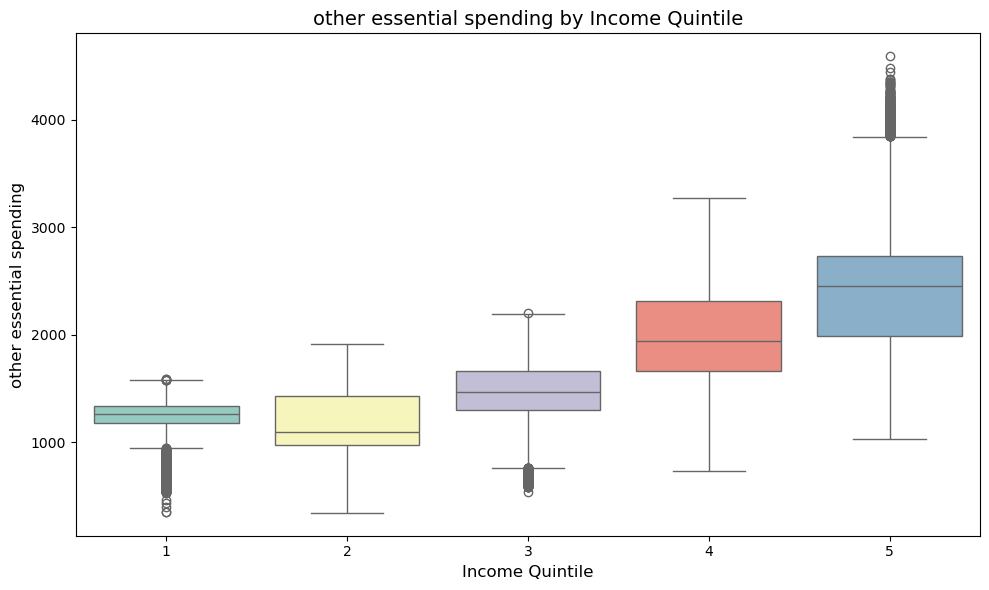

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


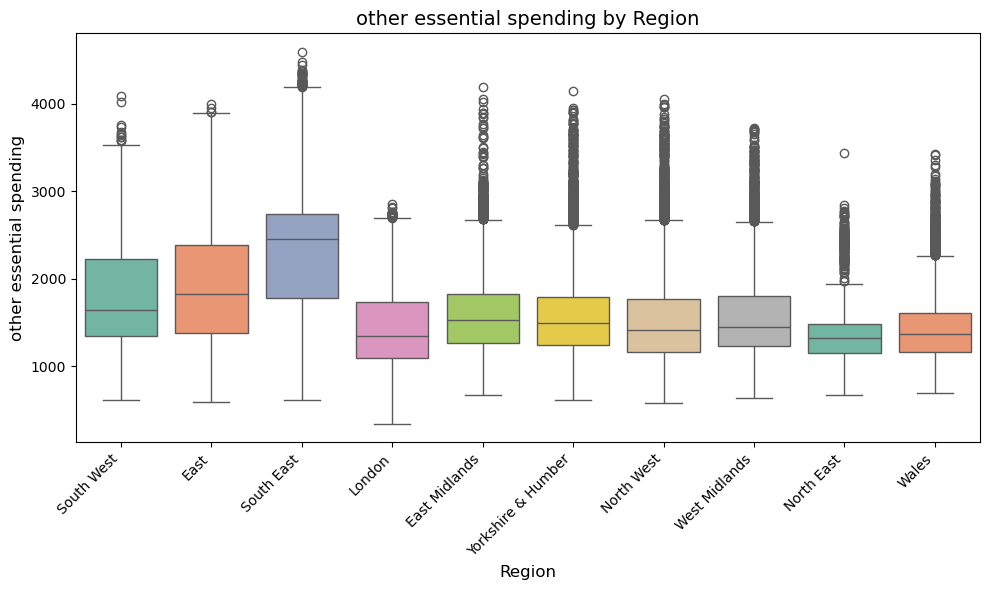

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


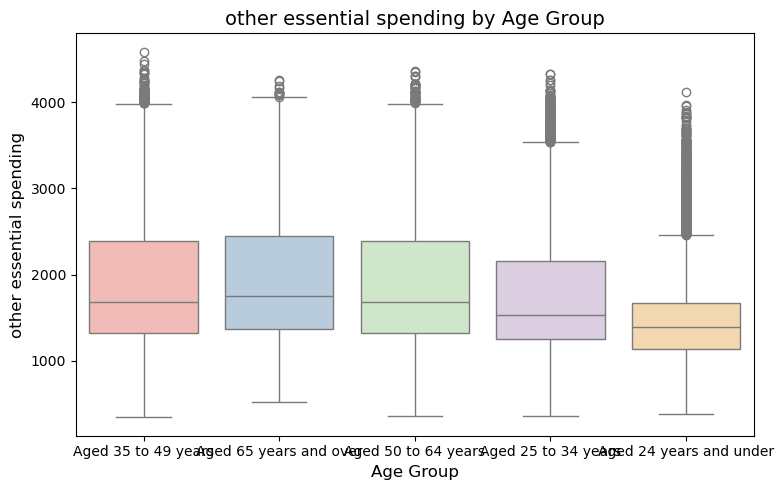

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


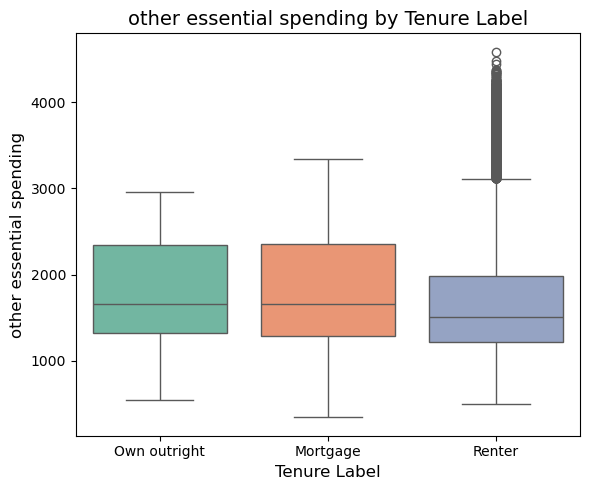

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


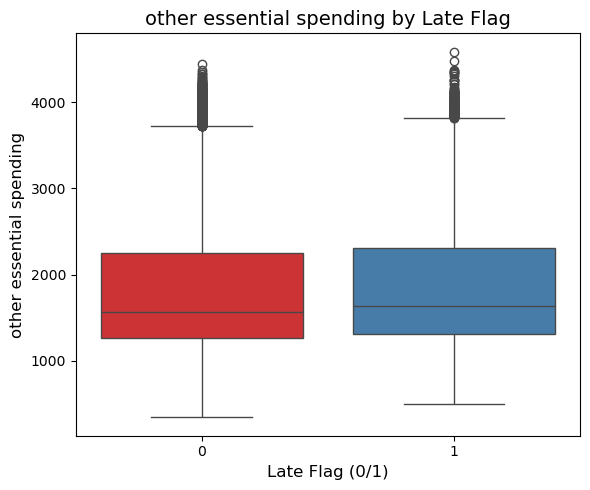

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


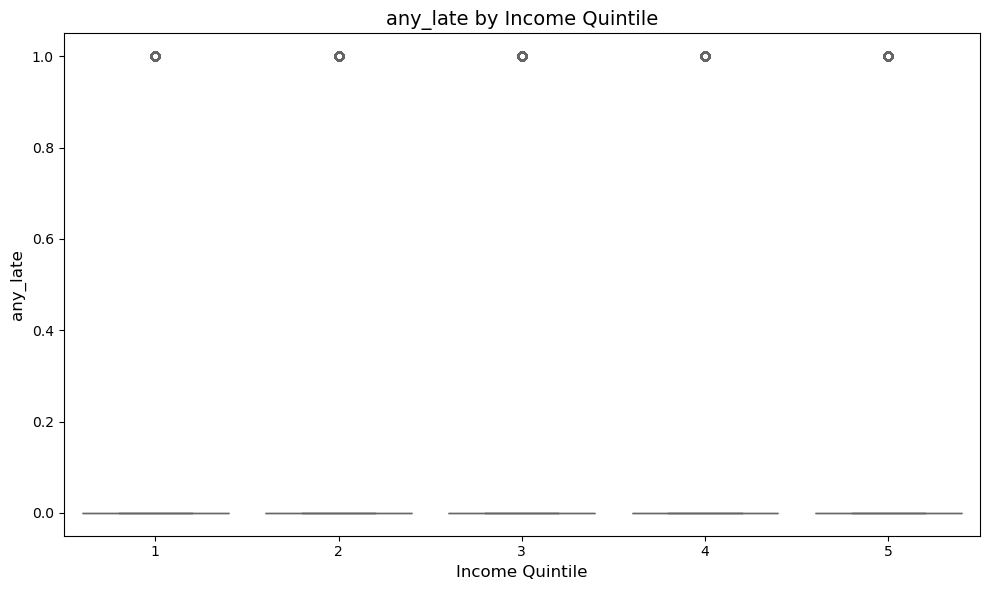

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


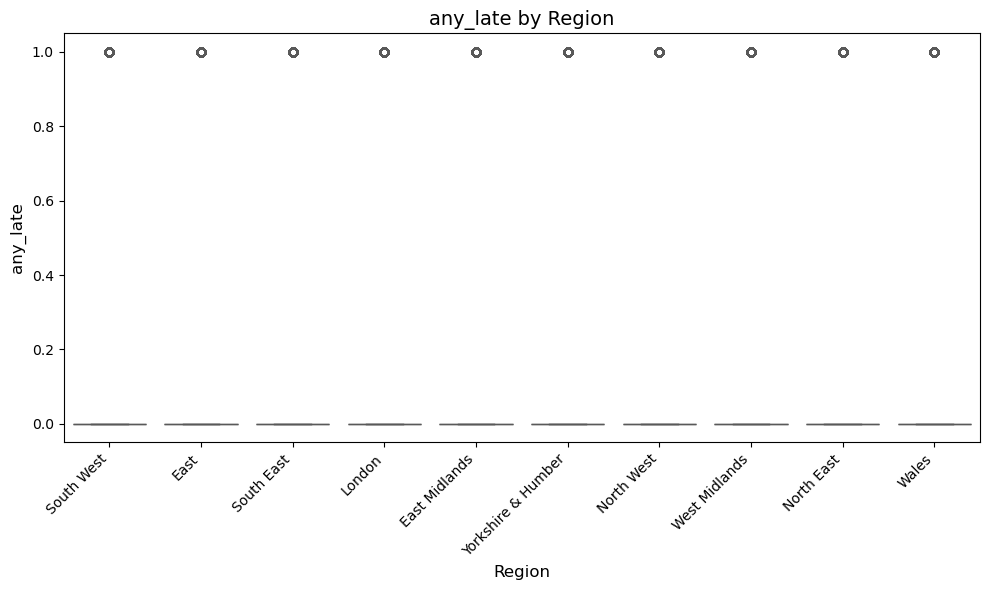

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


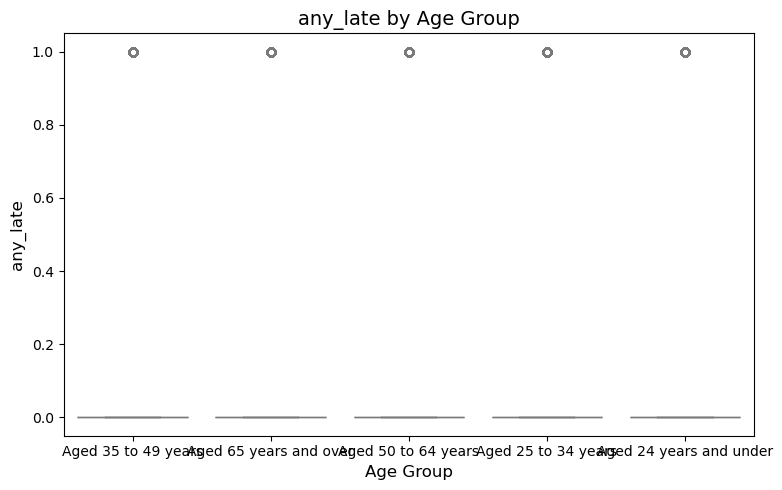

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


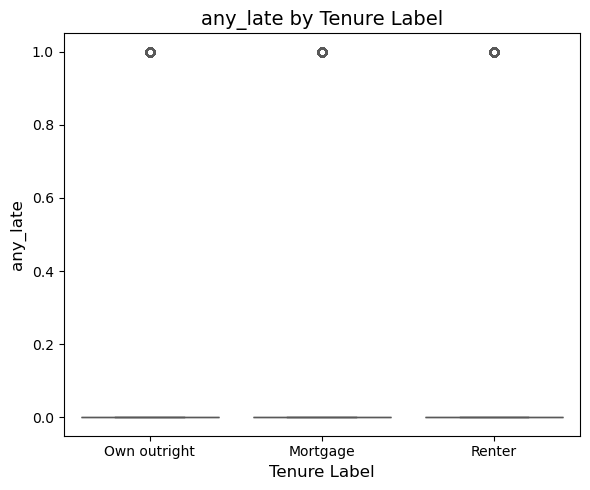

/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/548739509.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


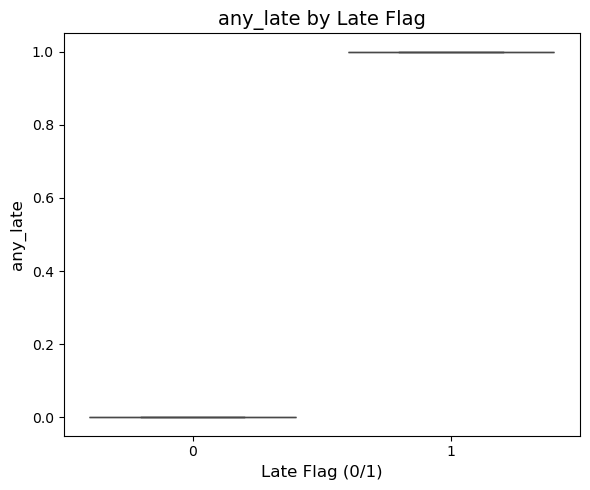

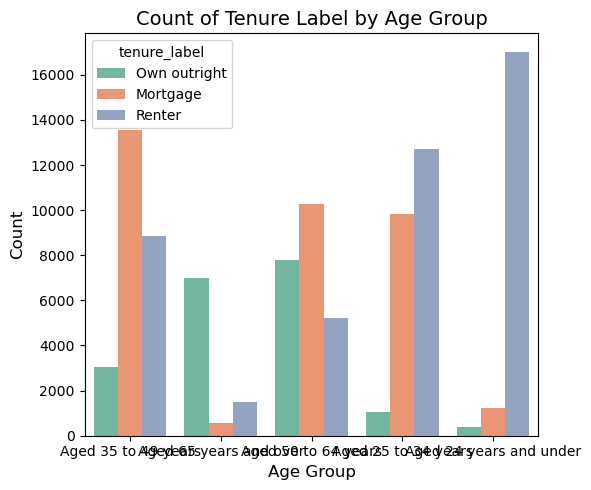

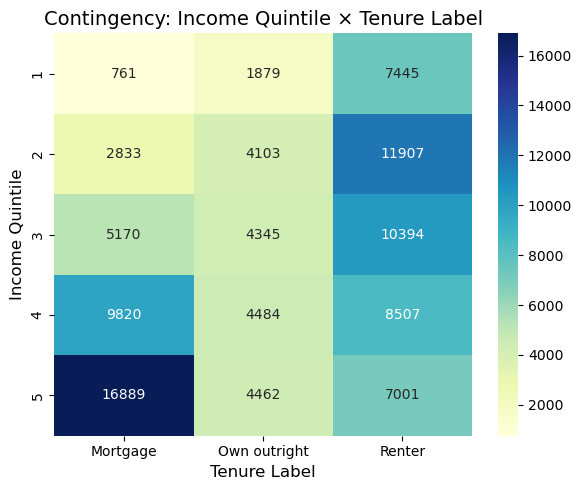

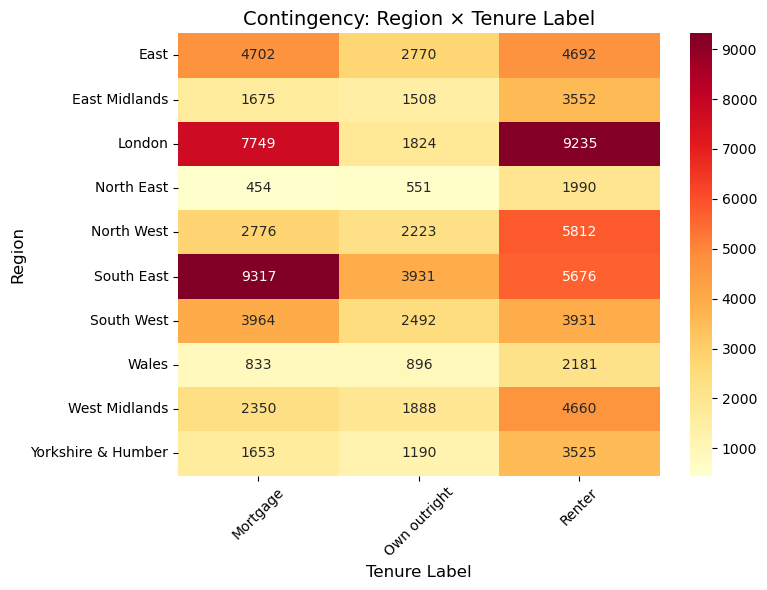

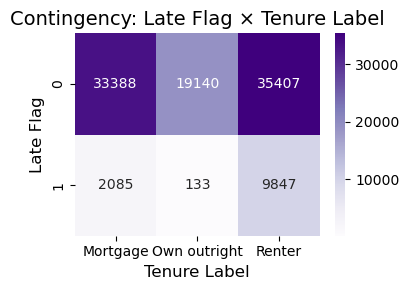

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ─────────────────────────────────────────────────────────────────────────────
# 1) Identify which columns are numeric vs. categorical in `robust`
# ─────────────────────────────────────────────────────────────────────────────

# Suppose `robust` is already in memory. E.g.:
# robust = pd.read_csv('Downloads/robust.csv')

# List of all columns in `robust`:
#   ['income', 'income quintile', 'dti', 'region', 'SOC_label',
#    'any_late', 'age_group', 'tenure_label', 
#    'proportion_of_income_spent_on_housing_cost',
#    'housing_cost', 'other essential spending']

# Define which are numeric vs. categorical:
numeric_cols = [
    'income',
    'dti',
    'proportion_of_income_spent_on_housing_cost',
    'housing_cost',
    'other essential spending'
]

# Even though 'any_late' is 0/1, treat it as numeric for correlation (or you can treat it as categorical if you like).
binary_cols = ['any_late']

# Categorical (string/object) columns:
cat_cols = [
    'income quintile',   # 5 levels
    'region',            # 10 levels
    'SOC_label',         # (however many)
    'age_group',         # 5 levels
    'tenure_label'       # 3 levels
]

# We'll do:
#  1) Correlation matrix on (numeric_cols + binary_cols)
#  2) Pairwise scatter/hexbin only for numeric‐numeric pairs (using seaborn’s pairplot or a scatter grid)
#  3) Boxplots (numeric vs. each categorical)
#  4) Countplots or a heatmap of cat vs. cat if desired


# ─────────────────────────────────────────────────────────────────────────────
# 2) Correlation matrix (Pearson) over purely numeric columns
# ─────────────────────────────────────────────────────────────────────────────

# Combine numeric + binary for a correlation matrix
corr_cols = numeric_cols + binary_cols
corr_df = robust[corr_cols].copy()

# Compute Pearson correlation
corr_matrix = corr_df.corr(method='pearson')  # or method='spearman' if you prefer

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title('Correlation Matrix (Numeric + Binary Columns)')
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 3) Pairwise scatter/hexbin for numeric vs. numeric
# ─────────────────────────────────────────────────────────────────────────────
# If you have ~5 numeric columns, a full pairplot is OK. But to avoid overplotting
# you can switch to Hexbin (for large n) or scatter with low alpha.

sns.pairplot(
    robust,
    vars=numeric_cols + binary_cols,   # includes any_late (0/1) as “numeric”
    kind='scatter',  # or kind='reg' / 'hist' or 'kde'
    plot_kws={'alpha': 0.3, 's': 10, 'edgecolor': 'none'},
)
plt.suptitle('Pairwise Scatter of Numeric/Binary Columns', y=1.02)
plt.show()

# Alternatively, pick just (income vs. dti) as a hexbin:
plt.figure(figsize=(6, 5))
plt.hexbin(
    robust['income'],
    robust['dti'],
    gridsize=50,
    cmap='Blues',
    mincnt=1
)
plt.colorbar(label='Count')
plt.xlabel('Income')
plt.ylabel('DTI')
plt.title('Hexbin: Income vs. DTI')
plt.tight_layout()
plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 4) Numeric vs. Categorical: boxplots (or violinplots)
#    – For each numeric column, visualize how it varies across each category
# ─────────────────────────────────────────────────────────────────────────────

for numcol in numeric_cols + binary_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='income quintile',
        y=numcol,
        data=robust,
        palette="Set3"
    )
    plt.title(f'{numcol} by Income Quintile')
    plt.xlabel('Income Quintile')
    plt.ylabel(numcol)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='region',
        y=numcol,
        data=robust,
        palette="Set2"
    )
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{numcol} by Region')
    plt.xlabel('Region')
    plt.ylabel(numcol)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(
        x='age_group',
        y=numcol,
        data=robust,
        palette="Pastel1"
    )
    plt.title(f'{numcol} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel(numcol)
    plt.tight_layout()
    plt.show()

    # If desired: boxplot by tenure_label or any_late
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        x='tenure_label',
        y=numcol,
        data=robust,
        palette="Set2"
    )
    plt.title(f'{numcol} by Tenure Label')
    plt.xlabel('Tenure Label')
    plt.ylabel(numcol)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 5))
    sns.boxplot(
        x='any_late',
        y=numcol,
        data=robust,
        palette="Set1"
    )
    plt.title(f'{numcol} by Late Flag')
    plt.xlabel('Late Flag (0/1)')
    plt.ylabel(numcol)
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 5) Categorical vs. categorical: countplots or contingency‐table heatmap
# ─────────────────────────────────────────────────────────────────────────────

# 5.a) Countplot of tenure_label by age_group
plt.figure(figsize=(6, 5))
sns.countplot(
    x='age_group',
    hue='tenure_label',
    data=robust,
    palette="Set2"
)
plt.title('Count of Tenure Label by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 5.b) Heatmap of (income_quintile × tenure_label) frequencies
cont_inc_ten = pd.crosstab(
    robust['income quintile'],
    robust['tenure_label']
)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cont_inc_ten,
    annot=True,
    fmt='d',
    cmap='YlGnBu'
)
plt.title('Contingency: Income Quintile × Tenure Label')
plt.xlabel('Tenure Label')
plt.ylabel('Income Quintile')
plt.tight_layout()
plt.show()

# 5.c) Heatmap of (region × tenure_label)
cont_reg_ten = pd.crosstab(
    robust['region'],
    robust['tenure_label']
)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cont_reg_ten,
    annot=True,
    fmt='d',
    cmap='YlOrRd'
)
plt.title('Contingency: Region × Tenure Label')
plt.xlabel('Tenure Label')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5.d) If you want (any_late × tenure_label), that’s a small 2×3 table
cont_late_ten = pd.crosstab(
    robust['any_late'],
    robust['tenure_label']
)
plt.figure(figsize=(4, 3))
sns.heatmap(
    cont_late_ten,
    annot=True,
    fmt='d',
    cmap='Purples'
)
plt.title('Contingency: Late Flag × Tenure Label')
plt.xlabel('Tenure Label')
plt.ylabel('Late Flag')
plt.tight_layout()
plt.show()


/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/2321943048.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/2321943048.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_region_initial = cond_tenure_region_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/2321943048.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/2321943048.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cond_age_tenure_initial = cond_age_tenure_initial.applymap(
/var/folders/4b/5ltgsxnn5ld2nrphb_rsnkr40000gn/T/ipykernel_59813/2321943048.py:48:

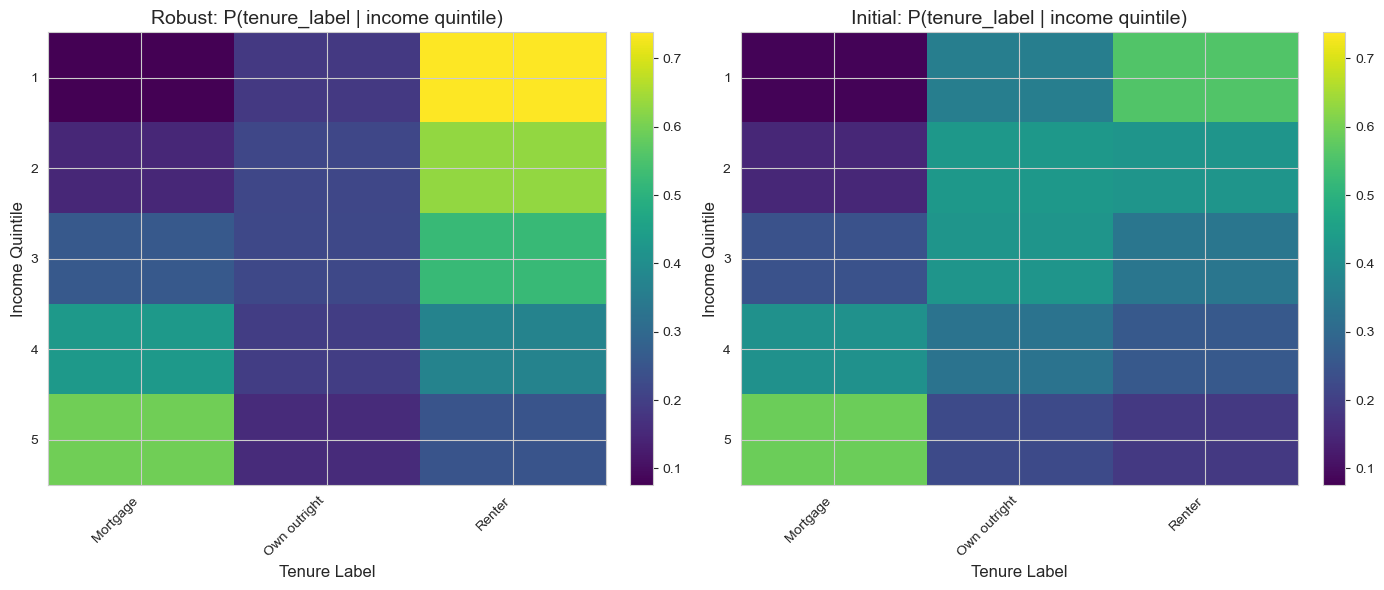

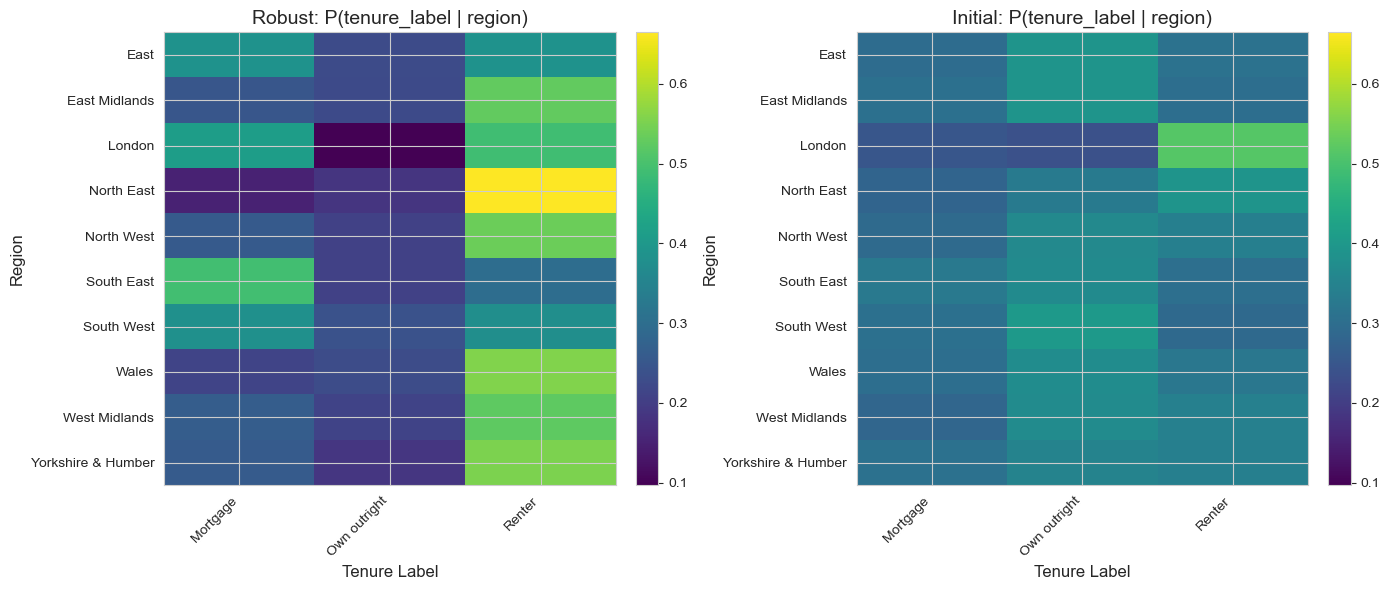

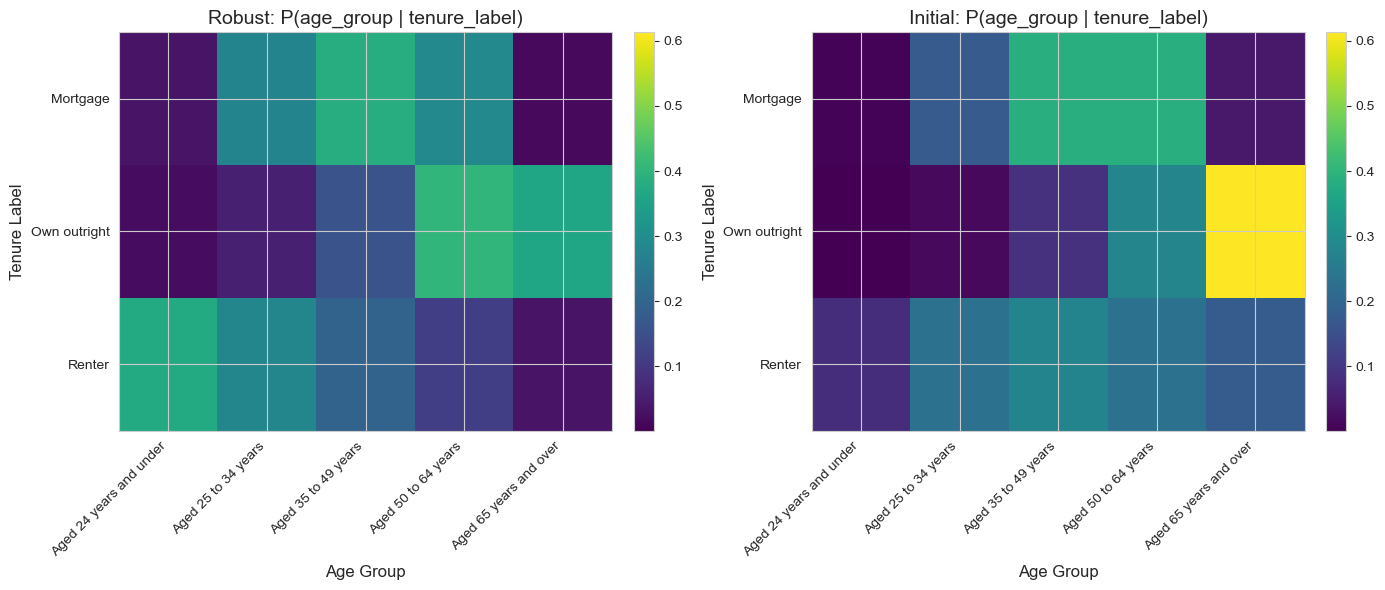

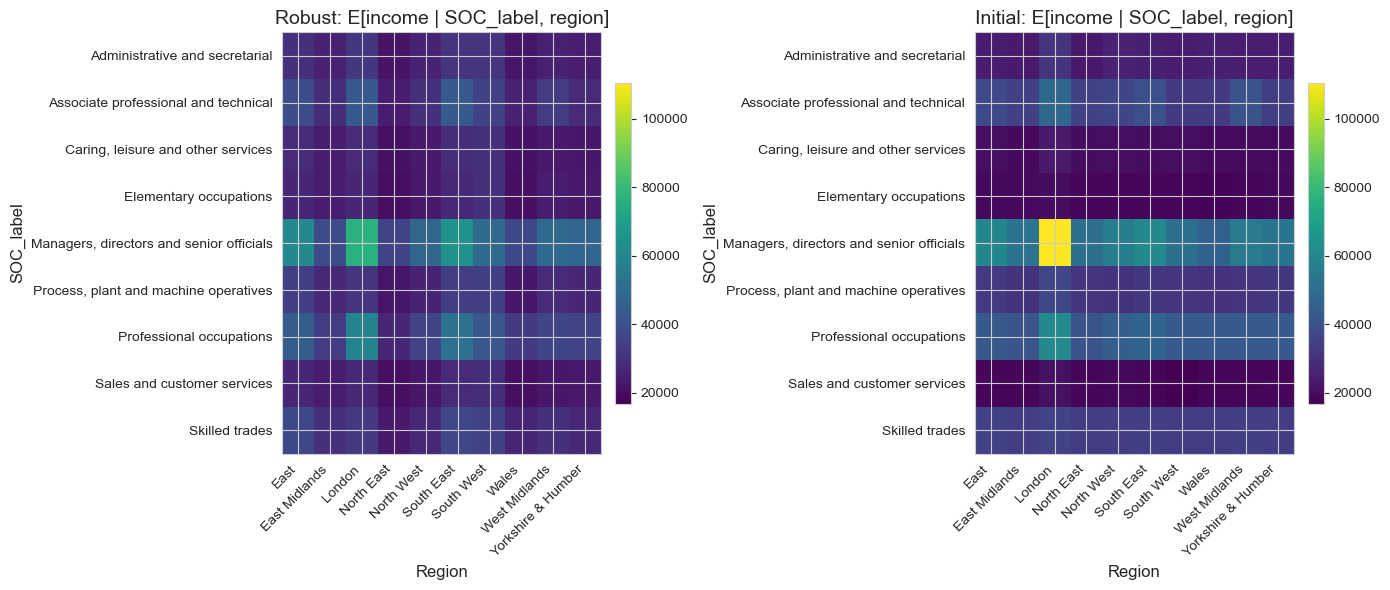

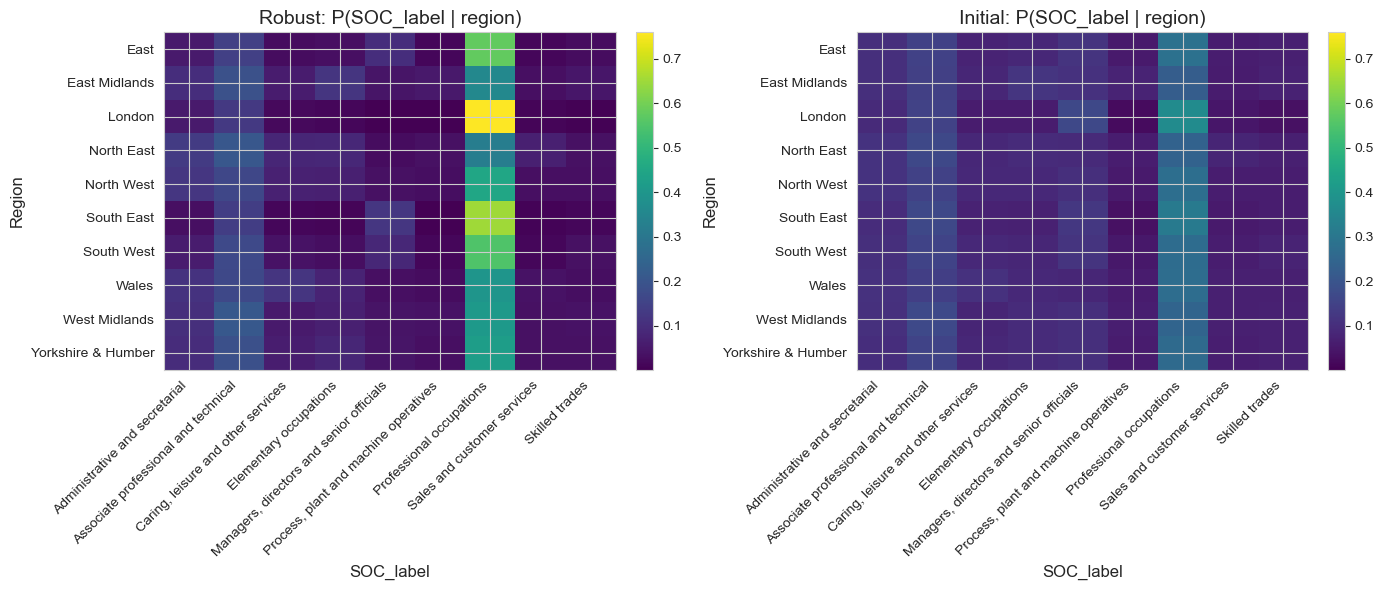

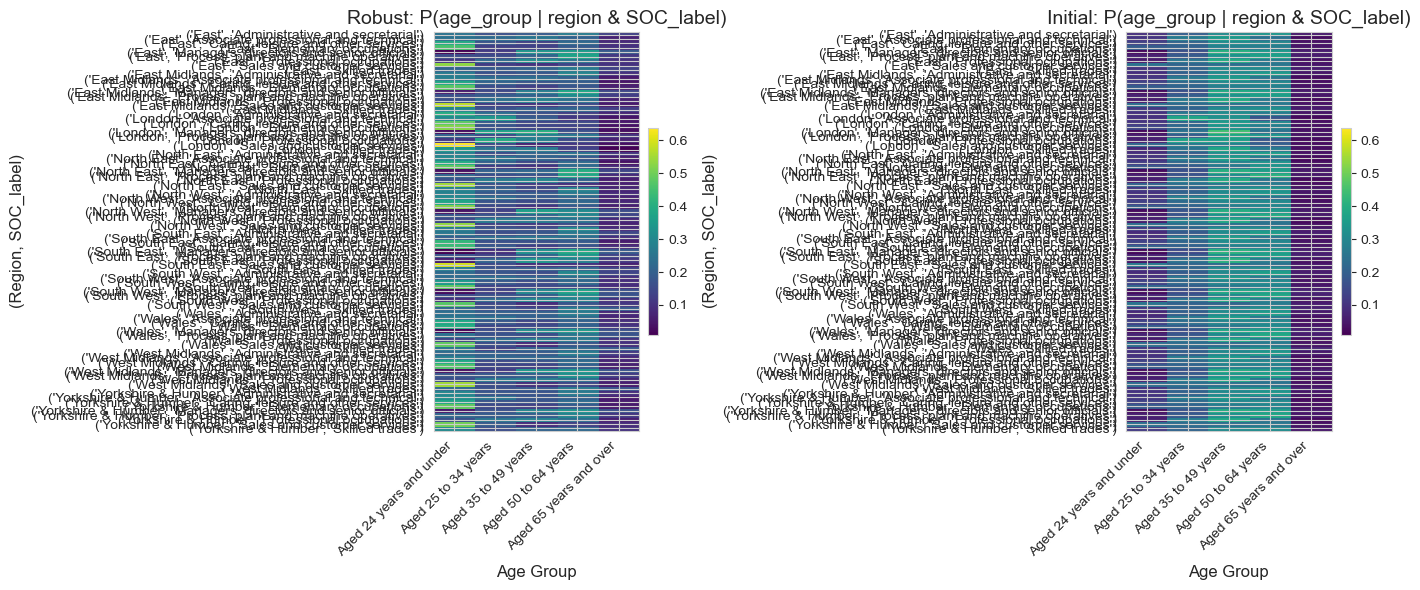

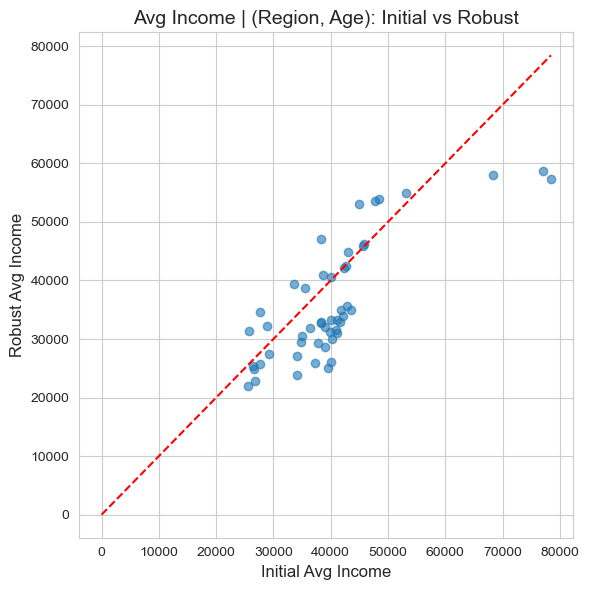

0.46186331455605045
[[1.        0.7906529]
 [0.7906529 1.       ]]


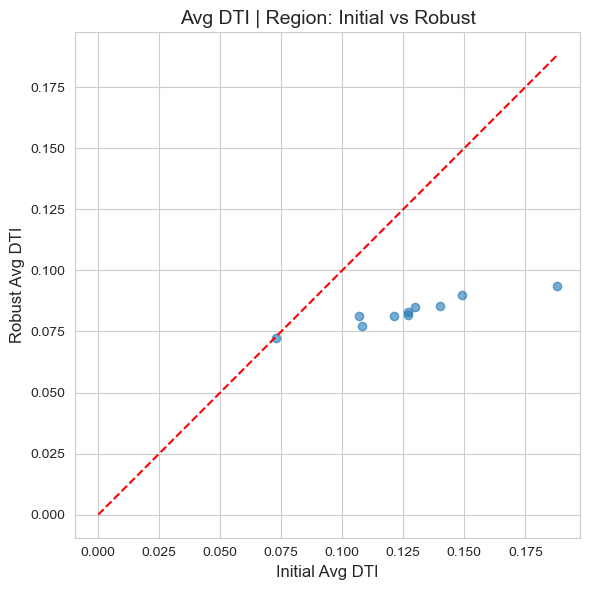

-2.4433690633569394
[[ 1.       -0.056765]
 [-0.056765  1.      ]]


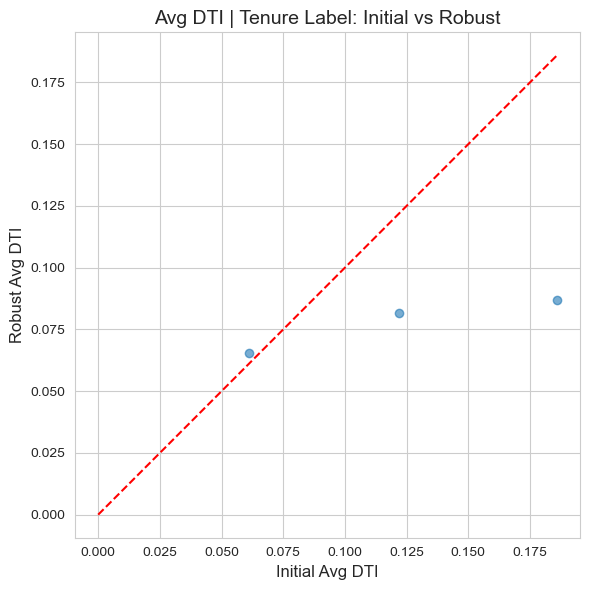

-1.1590463919358749
[[ 1.        -0.9615052]
 [-0.9615052  1.       ]]


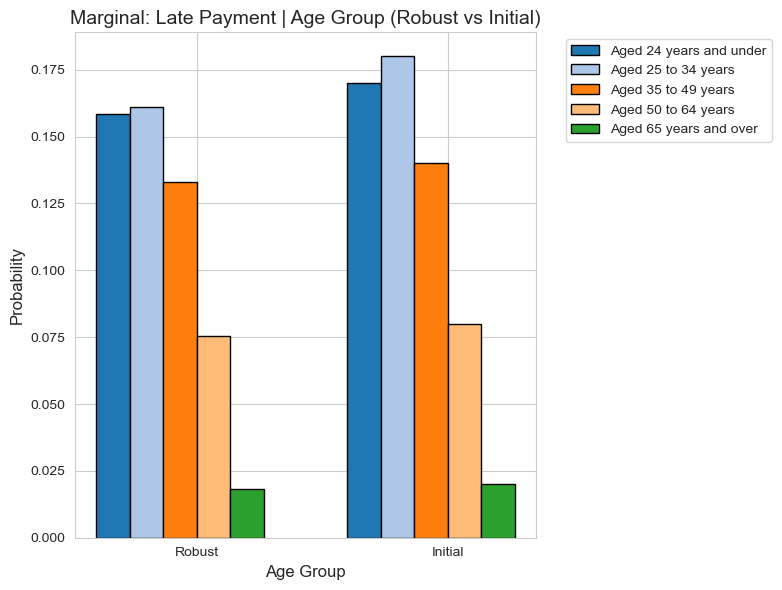

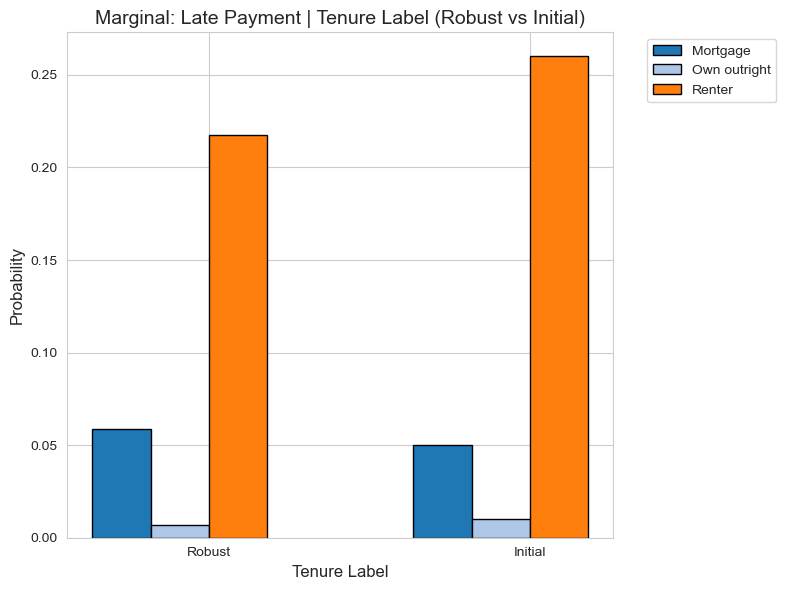

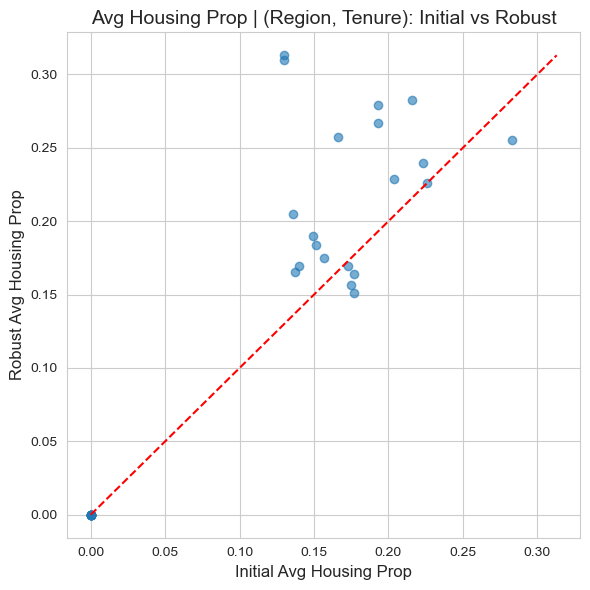

0.5630192669201077
[[1.         0.89242621]
 [0.89242621 1.        ]]


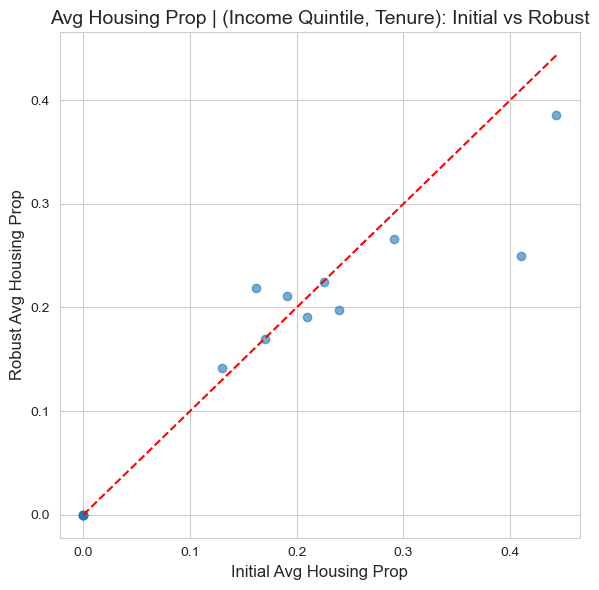

0.8824597278900438
[[1.        0.9526049]
 [0.9526049 1.       ]]


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics

# ─────────────────────────────────────────────────────────────────────────────
# Helper: Clean a pandas Series of “dirty” strings (commas, '%', whitespace) → floats
# ─────────────────────────────────────────────────────────────────────────────
def clean_and_numeric(series: pd.Series) -> pd.Series:
    """
    Convert a Series containing strings like '12,345' or '89%' into numeric floats.
    Non-convertible values become NaN.
    """
    s = (series
         .astype(str)
         .str.replace(',', '',  regex=False)
         .str.replace('%', '',  regex=False)
         .str.strip()
    )
    return pd.to_numeric(s, errors='coerce')


# ─────────────────────────────────────────────────────────────────────────────
# 1) Ensure all “initial” conditional DataFrames are numeric
# ─────────────────────────────────────────────────────────────────────────────

# 1.a) cond_tenure_inc5_initial: index=income quintile, columns=tenure_label
cond_tenure_inc5_initial = cond_tenure_inc5_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.b) cond_tenure_region_initial: index=region, columns=tenure_label
cond_tenure_region_initial = cond_tenure_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.c) cond_tenure_incQ_initial: index=incQ (treat as income quintile), columns=tenure_label
cond_tenure_incQ_initial = cond_tenure_incQ_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.d) cond_age_tenure_initial: index=tenure_label, columns=age_group
cond_age_tenure_initial = cond_age_tenure_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)

# 1.e) cond_soc_region_initial: index=region, columns=SOC_label
cond_soc_region_initial = cond_soc_region_initial.applymap(
    lambda x: clean_and_numeric(pd.Series([x])).iloc[0]
)


# ─────────────────────────────────────────────────────────────────────────────
# 2) Define helper to plot a pair of heatmaps (robust vs initial)
# ─────────────────────────────────────────────────────────────────────────────
def plot_heatmap_pair(df_robust: pd.DataFrame,
                      df_initial: pd.DataFrame,
                      x_label: str,
                      y_label: str,
                      title_rob: str,
                      title_init: str):
    """
    Display two side‐by‐side heatmaps: one for df_robust, one for df_initial.
    Both DataFrames must have the same index/columns (or will be reindexed).

    df_robust  : DataFrame(index=conditioning, columns=outcome, values=P(outcome|cond))
    df_initial : same shape; may have different index/columns.
    x_label    : label for horizontal axis (outcomes)
    y_label    : label for vertical axis (conditioning categories)
    title_rob  : title for robust heatmap
    title_init : title for initial heatmap
    """
    # 1) Align df_initial → df_robust
    df_init_aligned = df_initial.reindex(
        index=df_robust.index,
        columns=df_robust.columns,
        fill_value=0
    )

    data_rob  = df_robust.values
    data_init = df_init_aligned.values

    # 2) Compute shared vmin/vmax across both matrices
    vmin = min(data_rob.min(), data_init.min())
    vmax = max(data_rob.max(), data_init.max())

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 3) Plot the "robust" heatmap with the shared scale
    im0 = axes[0].imshow(data_rob, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    axes[0].set_xticks(np.arange(len(df_robust.columns)))
    axes[0].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[0].set_yticks(np.arange(len(df_robust.index)))
    axes[0].set_yticklabels(df_robust.index)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)
    axes[0].set_title(title_rob)
    fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    # 4) Plot the "initial" heatmap, using exactly the same vmin/vmax
    im1 = axes[1].imshow(data_init, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax)
    axes[1].set_xticks(np.arange(len(df_robust.columns)))
    axes[1].set_xticklabels(df_robust.columns, rotation=45, ha='right')
    axes[1].set_yticks(np.arange(len(df_robust.index)))
    axes[1].set_yticklabels(df_robust.index)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)
    axes[1].set_title(title_init)
    fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()



# ─────────────────────────────────────────────────────────────────────────────
# 3) Alternative: “facet bar charts” for one conditional as example
#    (Optional; comment out if not needed)
# ─────────────────────────────────────────────────────────────────────────────
def plot_facet_bars(cond_robust: pd.DataFrame,
                    cond_initial: pd.DataFrame,
                    cond_label: str,
                    outcome_label: str,
                    figsize_per_facet=(3, 3)):
    """
    For each conditioning category, draw a small bar chart showing robust vs initial
    distribution over outcomes. Plots are arranged in a grid.
    
    cond_robust  : DataFrame(index=conditioning, columns=outcome)
    cond_initial : DataFrame(index=conditioning, columns=outcome)
    cond_label   : label for conditioning axis (e.g. 'Income Quintile')
    outcome_label: label for outcome axis  (e.g. 'Tenure Label')
    """
    # 1) Align cond_initial → cond_robust
    cond_initial = cond_initial.reindex(
        index=cond_robust.index,
        columns=cond_robust.columns,
        fill_value=0
    )
    
    categories = list(cond_robust.index.astype(str))
    outcomes   = list(cond_robust.columns.astype(str))
    n_cats     = len(categories)
    
    # Determine grid size (roughly square)
    n_cols = int(np.ceil(np.sqrt(n_cats)))
    n_rows = int(np.ceil(n_cats / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(n_cols * figsize_per_facet[0],
                                      n_rows * figsize_per_facet[1]),
                             squeeze=False)
    
    for idx, cat in enumerate(categories):
        r = idx // n_cols
        c = idx % n_cols
        ax = axes[r][c]
        
        robust_vals  = cond_robust.loc[cat].values
        initial_vals = cond_initial.loc[cat].values
        x = np.arange(len(outcomes))
        width = 0.35
        
        ax.bar(x - width/2, robust_vals,  width, label='Robust', alpha=0.8)
        ax.bar(x + width/2, initial_vals, width, label='Initial', alpha=0.5)
        ax.set_xticks(x)
        ax.set_xticklabels(outcomes, rotation=45, ha='right')
        ax.set_title(f'{cond_label} = {cat}')
        if r == n_rows - 1:
            ax.set_xlabel(outcome_label)
        if c == 0:
            ax.set_ylabel('Probability')
        ax.legend(fontsize='small')
    
    # Hide any empty subplots
    for idx in range(n_cats, n_rows * n_cols):
        r = idx // n_cols
        c = idx % n_cols
        fig.delaxes(axes[r][c])
    
    plt.tight_layout()
    plt.show()


# ─────────────────────────────────────────────────────────────────────────────
# 4) Plot all 14 conditional marginals using heatmaps and facet bars
# ─────────────────────────────────────────────────────────────────────────────

# 4.1) P(tenure_label | income quintile)
#      Use heatmap pair
plot_heatmap_pair(
    cond_tenure_inc5_robust,
    cond_tenure_inc5_initial,
    x_label='Tenure Label',
    y_label='Income Quintile',
    title_rob='Robust: P(tenure_label | income quintile)',
    title_init='Initial: P(tenure_label | income quintile)'
)

# (Optional) facet bar chart for the same conditional:
# plot_facet_bars(
#     cond_tenure_inc5_robust,
#     cond_tenure_inc5_initial,
#     cond_label='Income Quintile',
#     outcome_label='Tenure Label'
# )


# 4.2) P(tenure_label | region)
plot_heatmap_pair(
    cond_tenure_region_robust,
    cond_tenure_region_initial,
    x_label='Tenure Label',
    y_label='Region',
    title_rob='Robust: P(tenure_label | region)',
    title_init='Initial: P(tenure_label | region)'
)

# (Optional) facet bar chart:
# plot_facet_bars(
#     cond_tenure_region_robust,
#     cond_tenure_region_initial,
#     cond_label='Region',
#     outcome_label='Tenure Label'
# )


# 4.3) P(tenure_label | income quintile (“incQ”))  ← duplicate of 4.1; skip.


# 4.4) P(age_group | tenure_label) - corrected + heat map
# --- Robust side (unchanged) ---
cond_age_tenure_robust = (
    robust
    .groupby(['tenure_label', 'age_group'])
    .size()
    .div(robust.groupby('tenure_label').size(), level='tenure_label')
    .unstack(fill_value=0)
)
# cond_age_tenure_robust: index = tenure_label, columns = age_group

# --- Initial side: rename columns so “tenure_label” and “age_group” match exactly ---
dfa = breakdown_by_tenure_label_and_age.rename(
    columns={'tenure label': 'tenure_label', 'age group': 'age_group'}
)
tmp = (
    dfa
    .groupby(['tenure_label', 'age_group'])['frequency']
    .sum()
)
cond_age_tenure_initial = tmp.div(tmp.groupby(level=0).sum(), level=0).unstack(fill_value=0)
# cond_age_tenure_initial: index = tenure_label, columns = age_group

# Now plot side‐by‐side heatmaps
plot_heatmap_pair(
    cond_age_tenure_robust,
    cond_age_tenure_initial,
    x_label='Age Group',
    y_label='Tenure Label',
    title_rob='Robust: P(age_group | tenure_label)',
    title_init='Initial: P(age_group | tenure_label)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_age_tenure_robust,
#     cond_age_tenure_initial,
#     cond_label='Tenure Label',
#     outcome_label='Age Group'
# )


# 4.5) E[income | SOC_label, region] – corrected + heatmap
# --- Robust side (unchanged) ---
avg_income_soc_region_robust = (
    robust
    .groupby(['SOC_label', 'region'])['income']
    .mean()
    .unstack(fill_value=0)
)
# avg_income_soc_region_robust: index = SOC_label, columns = region

# --- Initial side: ensure index = SOC_label, columns = region ---
avg_income_soc_region_initial = breakdown_by_income_and_SOC.copy()

# If “breakdown_by_income_and_SOC” has a column named "SOC_label" but is not already indexed:
if 'SOC_code' in avg_income_soc_region_initial.columns:
    pd.Index.rename('SOC_label', inplace = True)
    avg_income_soc_region_initial = avg_income_soc_region_initial.set_index('SOC_label')

# Now both DataFrames share:
#   index = SOC_label
#   columns = region
plot_heatmap_pair(
    avg_income_soc_region_robust,
    avg_income_soc_region_initial,
    x_label='Region',
    y_label='SOC_label',
    title_rob='Robust: E[income | SOC_label, region]',
    title_init='Initial: E[income | SOC_label, region]'
)


# 4.6) P(SOC_label | region) - corrected + heatmap
# --- Robust side (unchanged) ---
counts_soc_region_robust = (
    robust
    .groupby(['region', 'SOC_label'])
    .size()
    .unstack(fill_value=0)
)
cond_soc_region_robust = counts_soc_region_robust.div(
    counts_soc_region_robust.sum(axis=1), axis=0
)
# cond_soc_region_robust: index = region, columns = SOC_label

# --- Initial side: transpose breakdown_by_region_and_SOC so index=region, columns=SOC_label ---
temp = breakdown_by_region_and_SOC.copy()
# breakdown_by_region_and_SOC currently has index=SOC_label, columns=region
temp = temp.T
# Now: index=region, columns=SOC_label
cond_soc_region_initial = temp.div(temp.sum(axis=1), axis=0)
# cond_soc_region_initial: index=region, columns=SOC_label

plot_heatmap_pair(
    cond_soc_region_robust,
    cond_soc_region_initial,
    x_label='SOC_label',
    y_label='Region',
    title_rob='Robust: P(SOC_label | region)',
    title_init='Initial: P(SOC_label | region)'
)

# (Optional) facet bars:
# plot_facet_bars(
#     cond_soc_region_robust,
#     cond_soc_region_initial,
#     cond_label='Region',
#     outcome_label='SOC_label'
# )


# 4.7) P(age_group | (region, SOC_label)) – corrected + heatmap
# --- Robust side (unchanged) ---
counts_age_region_soc_robust = (
    robust
    .groupby(['region', 'SOC_label', 'age_group'])
    .size()
    .rename('count')
    .reset_index()
)
counts_age_region_soc_robust['cond_prob'] = (
    counts_age_region_soc_robust['count']
    / counts_age_region_soc_robust
        .groupby(['region', 'SOC_label'])['count']
        .transform('sum')
)
cond_age_region_soc_robust = counts_age_region_soc_robust.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_robust: index = (region, SOC_label), columns = age_group

# --- Initial side: rename “age group” → “age_group”, then pivot exactly the same way ---
df = breakdown_by_region_and_SOC_and_age.rename(columns={'age group': 'age_group'})
tmp = df.copy()
tmp['cond_prob'] = (
    tmp['Observation']
    / tmp.groupby(['region', 'SOC_label'])['Observation'].transform('sum')
)
cond_age_region_soc_initial = tmp.pivot_table(
    index=['region', 'SOC_label'],
    columns='age_group',
    values='cond_prob',
    fill_value=0
)
# cond_age_region_soc_initial: index = (region, SOC_label), columns = age_group

plot_heatmap_pair(
    cond_age_region_soc_robust,
    cond_age_region_soc_initial,
    x_label='Age Group',
    y_label='(Region, SOC_label)',
    title_rob='Robust: P(age_group | region & SOC_label)',
    title_init='Initial: P(age_group | region & SOC_label)'
)

# 4.8) E[income | (region, age_group)] – scatter
robust_flat2  = avg_income_region_age_robust.stack()
initial_flat2 = avg_income_region_age_initial.stack()
common_idx2   = robust_flat2.index.intersection(initial_flat2.index)

plt.figure(figsize=(6, 6))
plt.scatter(initial_flat2.loc[common_idx2],
            robust_flat2.loc[common_idx2],
            alpha=0.6)
m2 = max(initial_flat2.max(), robust_flat2.max())
plt.plot([0, m2], [0, m2], color='red', linestyle='--')
plt.xlabel('Initial Avg Income')
plt.ylabel('Robust Avg Income')
plt.title('Avg Income | (Region, Age): Initial vs Robust')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(initial_flat2, robust_flat2))
print(np.corrcoef(initial_flat2,robust_flat2))


# 4.9) E[dti | region] – scatter
common_idx3 = avg_dti_region_robust.index.intersection(avg_dti_region_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_region_initial.loc[common_idx3],
            avg_dti_region_robust.loc[common_idx3],
            alpha=0.6)
m3 = max(avg_dti_region_initial.max(), avg_dti_region_robust.max())
plt.plot([0, m3], [0, m3], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust Avg DTI')
plt.title('Avg DTI | Region: Initial vs Robust')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(avg_dti_region_initial, avg_dti_region_robust))
print(np.corrcoef(avg_dti_region_initial,avg_dti_region_robust))


# 4.10) E[dti | tenure_label] – scatter
common_idx4 = avg_dti_tenure_robust.index.intersection(avg_dti_tenure_initial.index)

plt.figure(figsize=(6, 6))
plt.scatter(avg_dti_tenure_initial.loc[common_idx4],
            avg_dti_tenure_robust.loc[common_idx4],
            alpha=0.6)
m4 = max(avg_dti_tenure_initial.max(), avg_dti_tenure_robust.max())
plt.plot([0, m4], [0, m4], color='red', linestyle='--')
plt.xlabel('Initial Avg DTI')
plt.ylabel('Robust Avg DTI')
plt.title('Avg DTI | Tenure Label: Initial vs Robust')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(avg_dti_tenure_initial, avg_dti_tenure_robust))
print(np.corrcoef(avg_dti_tenure_initial,avg_dti_tenure_robust))


# 4.11) P(late=1 | age_group) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_age,
    series_initial = late_by_age_initial,
    xlabel         = 'Age Group',
    title          = 'Marginal: Late Payment | Age Group (Robust vs Initial)'
)


# 4.12) P(late=1 | tenure_label) – two‐cluster nested
plot_two_group_nested(
    series_robust  = late_by_tenure,
    series_initial = late_by_tenure_initial,
    xlabel         = 'Tenure Label',
    title          = 'Marginal: Late Payment | Tenure Label (Robust vs Initial)'
)


# 4.13) E[housing_prop | (region, tenure_label)] – scatter
rob_hp_flat  = avg_housing_prop_region_tenure_robust.stack()
init_hp_flat = avg_housing_prop_region_tenure_initial.stack()
common_idx5 = rob_hp_flat.index.intersection(init_hp_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_flat.loc[common_idx5],
            rob_hp_flat.loc[common_idx5],
            alpha=0.6)
m5 = max(init_hp_flat.max(), rob_hp_flat.max())
plt.plot([0, m5], [0, m5], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust Avg Housing Prop')
plt.title('Avg Housing Prop | (Region, Tenure): Initial vs Robust')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(init_hp_flat, rob_hp_flat))
print(np.corrcoef(init_hp_flat, rob_hp_flat))


# 4.14) E[housing_prop | (income quintile, tenure_label)] – scatter
rob_hp_i_flat  = avg_housing_prop_inc5_tenure_robust.stack()
init_hp_i_flat = avg_housing_prop_inc5_tenure_initial.stack()
common_idx6    = rob_hp_i_flat.index.intersection(init_hp_i_flat.index)

plt.figure(figsize=(6, 6))
plt.scatter(init_hp_i_flat.loc[common_idx6],
            rob_hp_i_flat.loc[common_idx6],
            alpha=0.6)
m6 = max(init_hp_i_flat.max(), rob_hp_i_flat.max())
plt.plot([0, m6], [0, m6], color='red', linestyle='--')
plt.xlabel('Initial Avg Housing Prop')
plt.ylabel('Robust Avg Housing Prop')
plt.title('Avg Housing Prop | (Income Quintile, Tenure): Initial vs Robust')
plt.tight_layout()
plt.show()
print(sklearn.metrics.r2_score(init_hp_i_flat, rob_hp_i_flat))
print(np.corrcoef(init_hp_i_flat, rob_hp_i_flat))

In [16]:
robust['SOC_label'].unique()

array(['Professional occupations',
       'Managers, directors and senior officials',
       'Associate professional and technical',
       'Process, plant and machine operatives',
       'Caring, leisure and other services', 'Skilled trades',
       'Elementary occupations', 'Administrative and secretarial',
       'Sales and customer services'], dtype=object)

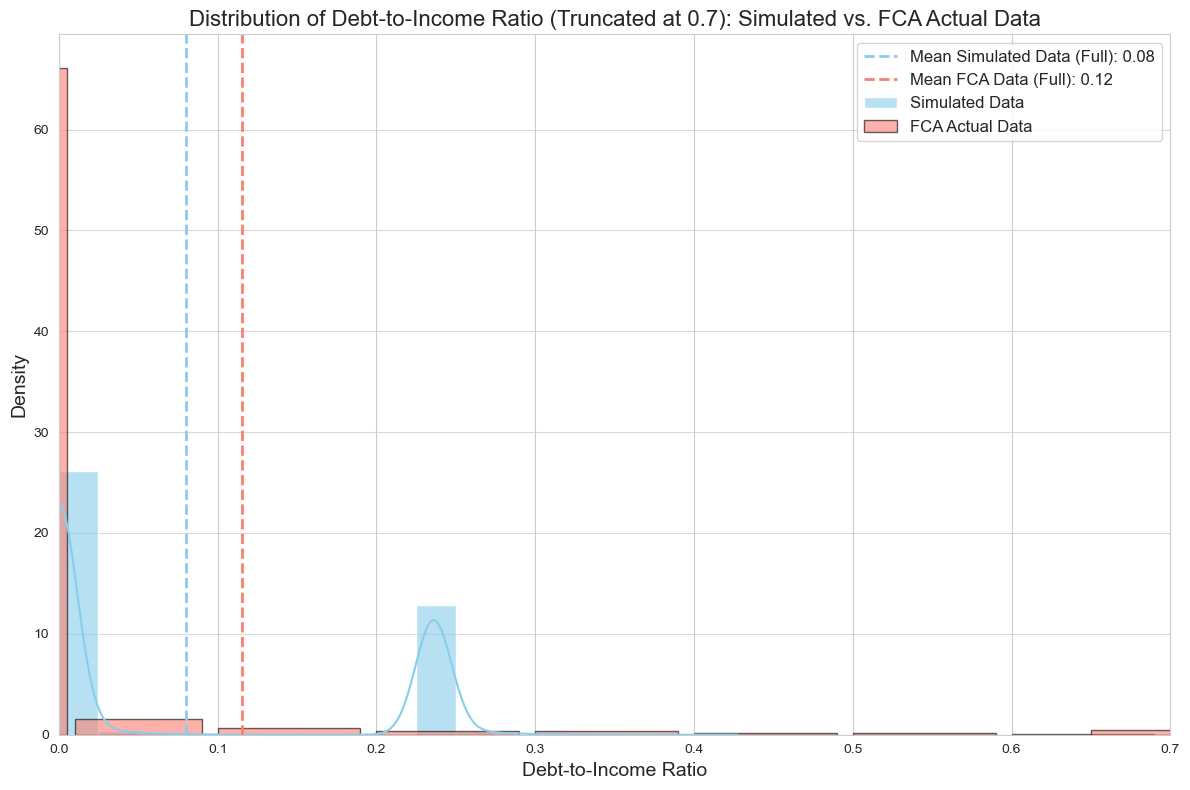

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the two CSV files
df_dti = pd.read_csv('Downloads/dti.csv')
df_dti_FCA = pd.read_csv('Downloads/dti_FCA.csv')

# Define the function to get DTI midpoint and handle special cases
def get_dti_info(dti_range_str):
    if dti_range_str == '0':
        return 0.0, 0.01  # Midpoint and assumed width for '0' category
    elif '>=' in dti_range_str:
        lower_bound = float(dti_range_str.replace('>=', ''))
        return lower_bound + 0.05, 0.1 # Midpoint and width for open-ended, adjust based on your binning logic
    elif '-' in dti_range_str:
        parts = dti_range_str.split('-')
        lower = float(parts[0])
        upper = float(parts[1])
        return (lower + upper) / 2, (upper - lower)
    else:
        try:
            val = float(dti_range_str)
            return val, 0.01 # For single numerical values, assume small width
        except ValueError:
            print(f"Warning: Could not parse '{dti_range_str}'. Returning (0.0, 0.01) as placeholder.")
            return 0.0, 0.01

# --- Calculate means for the FULL data ---
mean_dti_full = df_dti['debt_to_income'].mean()

df_dti_FCA_full_temp = df_dti_FCA.copy()
df_dti_FCA_full_temp[['dti_midpoint_full', 'bin_width_full']] = df_dti_FCA_full_temp['dti'].apply(lambda x: pd.Series(get_dti_info(x)))
mean_dti_FCA_full = np.average(df_dti_FCA_full_temp['dti_midpoint_full'], weights=df_dti_FCA_full_temp['Frequency'])

# --- Process df_dti_FCA for plotting (truncation and density standardization) ---
df_dti_FCA_plot_processing = df_dti_FCA.copy()
df_dti_FCA_plot_processing[['dti_midpoint', 'bin_width']] = df_dti_FCA_plot_processing['dti'].apply(lambda x: pd.Series(get_dti_info(x)))

TRUNCATION_POINT = 0.7

fca_over_truncation = df_dti_FCA_plot_processing[df_dti_FCA_plot_processing['dti_midpoint'] >= TRUNCATION_POINT].copy()
sum_frequency_over_truncation = fca_over_truncation['Frequency'].sum()

df_dti_FCA_plot = df_dti_FCA_plot_processing[df_dti_FCA_plot_processing['dti_midpoint'] < TRUNCATION_POINT].copy()

if sum_frequency_over_truncation > 0:
    aggregated_midpoint = TRUNCATION_POINT # Use the truncation point itself as the midpoint for the aggregated bin
    aggregated_bin_width = 0.1 # A fixed width for the aggregated bin for visualization purposes
    new_row = pd.DataFrame([{
        'dti': f'>={TRUNCATION_POINT:.2f}',
        'Frequency': sum_frequency_over_truncation,
        'dti_midpoint': aggregated_midpoint,
        'bin_width': aggregated_bin_width
    }])
    df_dti_FCA_plot = pd.concat([df_dti_FCA_plot, new_row], ignore_index=True)

df_dti_FCA_plot = df_dti_FCA_plot.sort_values(by='dti_midpoint').reset_index(drop=True)

total_fca_frequency_for_plot = df_dti_FCA_plot['Frequency'].sum()
df_dti_FCA_plot['density'] = df_dti_FCA_plot.apply(
    lambda row: row['Frequency'] / (total_fca_frequency_for_plot * row['bin_width']) if row['bin_width'] > 0 else 0,
    axis=1
)

# Set the style for the plot
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the distribution for df_dti, truncating at TRUNCATION_POINT for visualization
sns.histplot(df_dti['debt_to_income'], bins=30, kde=True, color='skyblue',
             label='Simulated Data', stat='density', alpha=0.6,
             binrange=(0, TRUNCATION_POINT + 0.05))

# Plot the distribution for df_dti_FCA_plot using densities and bin widths
for i, row in df_dti_FCA_plot.iterrows():
    plt.bar(row['dti_midpoint'], row['density'],
            width=row['bin_width'],
            color='salmon', alpha=0.6, edgecolor='black',
            label='FCA Actual Data' if i == 0 else "")

# Add vertical lines for the FULL means
plt.axvline(mean_dti_full, color='skyblue', linestyle='--', linewidth=2, label=f'Mean Simulated Data (Full): {mean_dti_full:.2f}')
plt.axvline(mean_dti_FCA_full, color='salmon', linestyle='--', linewidth=2, label=f'Mean FCA Data (Full): {mean_dti_FCA_full:.2f}')

# Set x-axis limit
plt.xlim(0, TRUNCATION_POINT)

# Add titles and labels
plt.title(f'Distribution of Debt-to-Income Ratio (Truncated at {TRUNCATION_POINT}): Simulated vs. FCA Actual Data', fontsize=16)
plt.xlabel('Debt-to-Income Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()